from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Multivariate/pHA')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten,Dropout, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

## Data Format

In [5]:
data = pd.read_csv("data/LocationD.csv")
data = data.drop(columns=["Unnamed: 0", "Date"])
data.head()

,TempD,pHD,ECD,DOD,BODD,TND
0,21.40,8.48,1695,2.59,27.93,1.27
1,20.75,8.44,1773,2.64,27.86,1.19
2,21.17,8.45,1737,2.61,27.71,1.23
3,21.20,8.36,1743,2.67,27.15,1.12
4,20.81,8.48,1787,2.68,27.19,1.13


In [6]:
target_column = "pHD"
features = data.drop(target_column, axis=1)
target = data[target_column]

In [7]:
X = []
y = []
for i in range(3, len(features)):
    X.append(features.iloc[i-3:i, :].values.ravel())  # Flatten features
    y.append(target.iloc[i])

X = np.array(X)
y = np.array(y)

In [8]:
X[0], y[0]

(array([2.140e+01, 1.695e+03, 2.590e+00, 2.793e+01, 1.270e+00, 2.075e+01,
        1.773e+03, 2.640e+00, 2.786e+01, 1.190e+00, 2.117e+01, 1.737e+03,
        2.610e+00, 2.771e+01, 1.230e+00]),
 8.36)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [10]:
xt = x_train.copy()
xt = xt.reshape(231,15,1)
xt.shape

(231, 15, 1)

In [11]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=xt)
target = y_train[window_size - 1:].flatten()

In [12]:
moving_avg_data.shape, target.shape

((229, 15, 1), (229,))

In [13]:
epochs = 50

# General Model

### CNN

In [14]:
x_train = xt.copy()

2024-03-15 05:35:04.147471: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-15 05:35:04.147617: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-15 05:35:04.147675: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-15 05:35:04.149006: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 94890.1953 - root_mean_squared_error: 308.0425  

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 13s 1s/step - loss: 94890.1953 - root_mean_squared_error: 308.0425 - val_loss: 58652.1016 - val_root_mean_squared_error: 242.1820
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 45765.3750 - root_mean_squared_error: 213.9284

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 519ms/step - loss: 43543.3320 - root_mean_squared_error: 208.6704 - val_loss: 27071.5293 - val_root_mean_squared_error: 164.5343
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 29982.9180 - root_mean_squared_error: 173.1558

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 445ms/step - loss: 19928.2520 - root_mean_squared_error: 141.1675 - val_loss: 10853.0010 - val_root_mean_squared_error: 104.1777
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 7922.2520 - root_mean_squared_error: 89.0070  

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 400ms/step - loss: 7242.7798 - root_mean_squared_error: 85.1045 - val_loss: 3076.4175 - val_root_mean_squared_error: 55.4655
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 1895.6447 - root_mean_squared_error: 43.5390

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 399ms/step - loss: 1704.5117 - root_mean_squared_error: 41.2857 - val_loss: 423.3866 - val_root_mean_squared_error: 20.5764
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 172.9620 - root_mean_squared_error: 13.1515

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 280ms/step - loss: 168.1090 - root_mean_squared_error: 12.9657 - val_loss: 10.1390 - val_root_mean_squared_error: 3.1842
Epoch 7/50
8/8 [==============================] - 0s 25ms/step - loss: 45.0612 - root_mean_squared_error: 6.7128 - val_loss: 115.4986 - val_root_mean_squared_error: 10.7470
Epoch 8/50
8/8 [==============================] - 0s 29ms/step - loss: 135.3087 - root_mean_squared_error: 11.6322 - val_loss: 151.5934 - val_root_mean_squared_error: 12.3123
Epoch 9/50
8/8 [==============================] - 0s 16ms/step - loss: 132.2904 - root_mean_squared_error: 11.5018 - val_loss: 104.4967 - val_root_mean_squared_error: 10.2224
Epoch 10/50
8/8 [==============================] - 0s 28ms/step - loss: 77.0598 - root_mean_squared_error: 8.7784 - val_loss: 46.5240 - val_root_mean_squared_error: 6.8209
Epoch 11/50
8/8 [==============================] - 0s 30ms/step - loss: 30.1440 - root_mean_squared_error: 5.4904 - val_loss: 15.7016 - val_ro

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 505ms/step - loss: 10.6099 - root_mean_squared_error: 3.2573 - val_loss: 8.6102 - val_root_mean_squared_error: 2.9343
Epoch 13/50
8/8 [==============================] - 0s 38ms/step - loss: 7.9761 - root_mean_squared_error: 2.8242 - val_loss: 9.3766 - val_root_mean_squared_error: 3.0621
Epoch 14/50
8/8 [==============================] - 0s 27ms/step - loss: 9.0194 - root_mean_squared_error: 3.0032 - val_loss: 9.7774 - val_root_mean_squared_error: 3.1269
Epoch 15/50
8/8 [==============================] - 0s 28ms/step - loss: 8.8836 - root_mean_squared_error: 2.9805 - val_loss: 9.0841 - val_root_mean_squared_error: 3.0140
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 8.1197 - root_mean_squared_error: 2.8495

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 383ms/step - loss: 8.0975 - root_mean_squared_error: 2.8456 - val_loss: 8.5113 - val_root_mean_squared_error: 2.9174
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 7.6429 - root_mean_squared_error: 2.7646

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 464ms/step - loss: 7.6986 - root_mean_squared_error: 2.7746 - val_loss: 8.3844 - val_root_mean_squared_error: 2.8956
Epoch 18/50
8/8 [==============================] - 0s 44ms/step - loss: 7.5681 - root_mean_squared_error: 2.7510 - val_loss: 8.4122 - val_root_mean_squared_error: 2.9004
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 7.5648 - root_mean_squared_error: 2.7504 

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 514ms/step - loss: 7.5648 - root_mean_squared_error: 2.7504 - val_loss: 8.3644 - val_root_mean_squared_error: 2.8921
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 7.9621 - root_mean_squared_error: 2.8217

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 501ms/step - loss: 7.5164 - root_mean_squared_error: 2.7416 - val_loss: 8.2810 - val_root_mean_squared_error: 2.8777
Epoch 21/50
5/8 [=================>............] - ETA: 0s - loss: 7.3617 - root_mean_squared_error: 2.7132

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 481ms/step - loss: 7.4554 - root_mean_squared_error: 2.7305 - val_loss: 8.2026 - val_root_mean_squared_error: 2.8640
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 7.5964 - root_mean_squared_error: 2.7562

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 390ms/step - loss: 7.3871 - root_mean_squared_error: 2.7179 - val_loss: 8.1466 - val_root_mean_squared_error: 2.8542
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 5.9084 - root_mean_squared_error: 2.4307

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 554ms/step - loss: 7.3432 - root_mean_squared_error: 2.7098 - val_loss: 8.0901 - val_root_mean_squared_error: 2.8443
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 7.4588 - root_mean_squared_error: 2.7311

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 6s 918ms/step - loss: 7.3079 - root_mean_squared_error: 2.7033 - val_loss: 8.0239 - val_root_mean_squared_error: 2.8327
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 7.2252 - root_mean_squared_error: 2.6880

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 512ms/step - loss: 7.2252 - root_mean_squared_error: 2.6880 - val_loss: 7.9398 - val_root_mean_squared_error: 2.8178
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 7.6568 - root_mean_squared_error: 2.7671

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 473ms/step - loss: 7.1641 - root_mean_squared_error: 2.6766 - val_loss: 7.8837 - val_root_mean_squared_error: 2.8078
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 7.1175 - root_mean_squared_error: 2.6679

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 560ms/step - loss: 7.1175 - root_mean_squared_error: 2.6679 - val_loss: 7.8092 - val_root_mean_squared_error: 2.7945
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 7.0699 - root_mean_squared_error: 2.6589

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 456ms/step - loss: 7.0286 - root_mean_squared_error: 2.6512 - val_loss: 7.7078 - val_root_mean_squared_error: 2.7763
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 6.7955 - root_mean_squared_error: 2.6068

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 520ms/step - loss: 6.9528 - root_mean_squared_error: 2.6368 - val_loss: 7.6247 - val_root_mean_squared_error: 2.7613
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 6.8538 - root_mean_squared_error: 2.6180

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 515ms/step - loss: 6.8825 - root_mean_squared_error: 2.6234 - val_loss: 7.5337 - val_root_mean_squared_error: 2.7448
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 6.7374 - root_mean_squared_error: 2.5957

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 511ms/step - loss: 6.8104 - root_mean_squared_error: 2.6097 - val_loss: 7.4499 - val_root_mean_squared_error: 2.7295
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 6.7288 - root_mean_squared_error: 2.5940

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 693ms/step - loss: 6.7217 - root_mean_squared_error: 2.5926 - val_loss: 7.3583 - val_root_mean_squared_error: 2.7126
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 6.4433 - root_mean_squared_error: 2.5384

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 577ms/step - loss: 6.6442 - root_mean_squared_error: 2.5776 - val_loss: 7.2621 - val_root_mean_squared_error: 2.6948
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 6.5348 - root_mean_squared_error: 2.5563

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 407ms/step - loss: 6.5348 - root_mean_squared_error: 2.5563 - val_loss: 7.1763 - val_root_mean_squared_error: 2.6789
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 6.4403 - root_mean_squared_error: 2.5378

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 507ms/step - loss: 6.4403 - root_mean_squared_error: 2.5378 - val_loss: 7.0725 - val_root_mean_squared_error: 2.6594
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 6.1928 - root_mean_squared_error: 2.4885

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 504ms/step - loss: 6.3548 - root_mean_squared_error: 2.5209 - val_loss: 6.9711 - val_root_mean_squared_error: 2.6403
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 6.3529 - root_mean_squared_error: 2.5205

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 445ms/step - loss: 6.2654 - root_mean_squared_error: 2.5031 - val_loss: 6.9209 - val_root_mean_squared_error: 2.6308
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 5.2061 - root_mean_squared_error: 2.2817

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 468ms/step - loss: 6.2007 - root_mean_squared_error: 2.4901 - val_loss: 6.8320 - val_root_mean_squared_error: 2.6138
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 5.8885 - root_mean_squared_error: 2.4266

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 6.1061 - root_mean_squared_error: 2.4711 - val_loss: 6.7021 - val_root_mean_squared_error: 2.5888
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 4.3928 - root_mean_squared_error: 2.0959

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 576ms/step - loss: 6.0464 - root_mean_squared_error: 2.4589 - val_loss: 6.5772 - val_root_mean_squared_error: 2.5646
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 5.9161 - root_mean_squared_error: 2.4323

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 586ms/step - loss: 5.9161 - root_mean_squared_error: 2.4323 - val_loss: 6.4653 - val_root_mean_squared_error: 2.5427
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 5.2747 - root_mean_squared_error: 2.2967

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 481ms/step - loss: 5.7971 - root_mean_squared_error: 2.4077 - val_loss: 6.3977 - val_root_mean_squared_error: 2.5294
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 5.7227 - root_mean_squared_error: 2.3922

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 519ms/step - loss: 5.6994 - root_mean_squared_error: 2.3873 - val_loss: 6.2542 - val_root_mean_squared_error: 2.5008
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 6.0060 - root_mean_squared_error: 2.4507

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 655ms/step - loss: 5.5791 - root_mean_squared_error: 2.3620 - val_loss: 6.1243 - val_root_mean_squared_error: 2.4747
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 5.4576 - root_mean_squared_error: 2.3361

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 427ms/step - loss: 5.4576 - root_mean_squared_error: 2.3361 - val_loss: 5.9968 - val_root_mean_squared_error: 2.4488
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 5.9806 - root_mean_squared_error: 2.4455

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 509ms/step - loss: 5.3465 - root_mean_squared_error: 2.3122 - val_loss: 5.8566 - val_root_mean_squared_error: 2.4200
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 5.2524 - root_mean_squared_error: 2.2918

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 411ms/step - loss: 5.2197 - root_mean_squared_error: 2.2847 - val_loss: 5.7307 - val_root_mean_squared_error: 2.3939
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 5.0476 - root_mean_squared_error: 2.2467

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 466ms/step - loss: 5.1186 - root_mean_squared_error: 2.2624 - val_loss: 5.5770 - val_root_mean_squared_error: 2.3616
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 4.9024 - root_mean_squared_error: 2.2141

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 457ms/step - loss: 5.0063 - root_mean_squared_error: 2.2375 - val_loss: 5.4297 - val_root_mean_squared_error: 2.3302
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 4.8799 - root_mean_squared_error: 2.2090

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 15ms/step


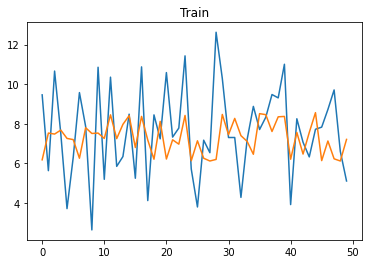

2/2 [==============================] - 0s 3ms/step


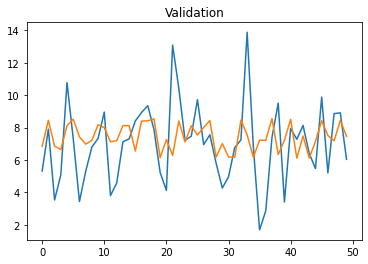

3/3 [==============================] - 0s 22ms/step


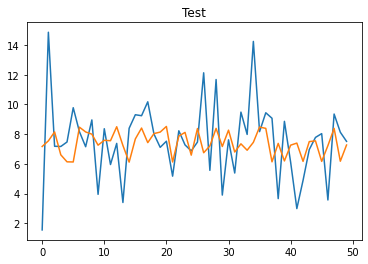

3/3 [==============================] - 0s 5ms/step


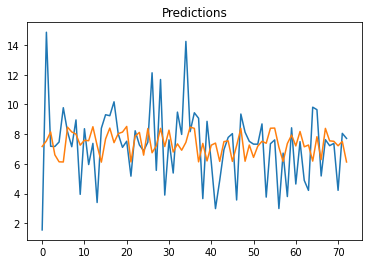

In [15]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 43.7939 - root_mean_squared_error: 6.6177

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 34s 3s/step - loss: 43.7315 - root_mean_squared_error: 6.6130 - val_loss: 41.3457 - val_root_mean_squared_error: 6.4301
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 41.3117 - root_mean_squared_error: 6.4274

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 41.2044 - root_mean_squared_error: 6.4191 - val_loss: 38.8949 - val_root_mean_squared_error: 6.2366
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 38.7624 - root_mean_squared_error: 6.2259

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 27s 4s/step - loss: 38.7449 - root_mean_squared_error: 6.2245 - val_loss: 36.5092 - val_root_mean_squared_error: 6.0423
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 36.3568 - root_mean_squared_error: 6.0297

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 36.3568 - root_mean_squared_error: 6.0297 - val_loss: 34.1831 - val_root_mean_squared_error: 5.8466
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 34.0267 - root_mean_squared_error: 5.8332

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 34.0267 - root_mean_squared_error: 5.8332 - val_loss: 31.9562 - val_root_mean_squared_error: 5.6530
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 31.9493 - root_mean_squared_error: 5.6524

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 31.8049 - root_mean_squared_error: 5.6396 - val_loss: 29.7945 - val_root_mean_squared_error: 5.4584
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 29.7143 - root_mean_squared_error: 5.4511

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 29.6428 - root_mean_squared_error: 5.4445 - val_loss: 27.7020 - val_root_mean_squared_error: 5.2633
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 27.3604 - root_mean_squared_error: 5.2307

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 27.5373 - root_mean_squared_error: 5.2476 - val_loss: 25.6814 - val_root_mean_squared_error: 5.0677
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 25.5189 - root_mean_squared_error: 5.0516

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 25.5295 - root_mean_squared_error: 5.0527 - val_loss: 23.7358 - val_root_mean_squared_error: 4.8719
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 24.1061 - root_mean_squared_error: 4.9098

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 29s 4s/step - loss: 23.5804 - root_mean_squared_error: 4.8560 - val_loss: 21.8394 - val_root_mean_squared_error: 4.6733
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 21.7163 - root_mean_squared_error: 4.6601

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 21.6563 - root_mean_squared_error: 4.6536 - val_loss: 19.9732 - val_root_mean_squared_error: 4.4691
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 19.7357 - root_mean_squared_error: 4.4425

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 19.7671 - root_mean_squared_error: 4.4460 - val_loss: 18.1124 - val_root_mean_squared_error: 4.2559
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 17.8872 - root_mean_squared_error: 4.2293

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 17.8872 - root_mean_squared_error: 4.2293 - val_loss: 16.3040 - val_root_mean_squared_error: 4.0378
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 16.1079 - root_mean_squared_error: 4.0135

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 2s/step - loss: 16.0497 - root_mean_squared_error: 4.0062 - val_loss: 14.5246 - val_root_mean_squared_error: 3.8111
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 14.3461 - root_mean_squared_error: 3.7876

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 14.3116 - root_mean_squared_error: 3.7831 - val_loss: 12.9482 - val_root_mean_squared_error: 3.5984
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 12.8352 - root_mean_squared_error: 3.5826

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 12.7562 - root_mean_squared_error: 3.5716 - val_loss: 11.4930 - val_root_mean_squared_error: 3.3901
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 11.3136 - root_mean_squared_error: 3.3636

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 28s 4s/step - loss: 11.3136 - root_mean_squared_error: 3.3636 - val_loss: 10.1373 - val_root_mean_squared_error: 3.1839
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 9.9680 - root_mean_squared_error: 3.1572 

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 9.9680 - root_mean_squared_error: 3.1572 - val_loss: 8.8834 - val_root_mean_squared_error: 2.9805
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 8.7864 - root_mean_squared_error: 2.9642

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 8.7357 - root_mean_squared_error: 2.9556 - val_loss: 7.7537 - val_root_mean_squared_error: 2.7845
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 7.5875 - root_mean_squared_error: 2.7545

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 7.6121 - root_mean_squared_error: 2.7590 - val_loss: 6.7376 - val_root_mean_squared_error: 2.5957
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 6.6566 - root_mean_squared_error: 2.5800

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 6.6172 - root_mean_squared_error: 2.5724 - val_loss: 5.8281 - val_root_mean_squared_error: 2.4141
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 5.7407 - root_mean_squared_error: 2.3960

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 5.7226 - root_mean_squared_error: 2.3922 - val_loss: 5.0224 - val_root_mean_squared_error: 2.2411
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 4.9312 - root_mean_squared_error: 2.2206

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 27s 4s/step - loss: 4.9312 - root_mean_squared_error: 2.2206 - val_loss: 4.3137 - val_root_mean_squared_error: 2.0769
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 4.3555 - root_mean_squared_error: 2.0870

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 4.2325 - root_mean_squared_error: 2.0573 - val_loss: 3.6969 - val_root_mean_squared_error: 1.9227
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 3.6237 - root_mean_squared_error: 1.9036

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 3.6345 - root_mean_squared_error: 1.9064 - val_loss: 3.1713 - val_root_mean_squared_error: 1.7808
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 3.0611 - root_mean_squared_error: 1.7496

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 3.1168 - root_mean_squared_error: 1.7654 - val_loss: 2.7234 - val_root_mean_squared_error: 1.6503
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2.6699 - root_mean_squared_error: 1.6340

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2.6699 - root_mean_squared_error: 1.6340 - val_loss: 2.3427 - val_root_mean_squared_error: 1.5306
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2.3611 - root_mean_squared_error: 1.5366

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2.3014 - root_mean_squared_error: 1.5171 - val_loss: 2.0243 - val_root_mean_squared_error: 1.4228
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 1.9768 - root_mean_squared_error: 1.4060

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 1.9891 - root_mean_squared_error: 1.4103 - val_loss: 1.7588 - val_root_mean_squared_error: 1.3262
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 1.7039 - root_mean_squared_error: 1.3053

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 1.7249 - root_mean_squared_error: 1.3134 - val_loss: 1.5413 - val_root_mean_squared_error: 1.2415
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 1.5072 - root_mean_squared_error: 1.2277

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 1.5072 - root_mean_squared_error: 1.2277 - val_loss: 1.3624 - val_root_mean_squared_error: 1.1672
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 1.3355 - root_mean_squared_error: 1.1556

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 1.3312 - root_mean_squared_error: 1.1538 - val_loss: 1.2149 - val_root_mean_squared_error: 1.1022
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 1.1581 - root_mean_squared_error: 1.0762

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 1.1827 - root_mean_squared_error: 1.0875 - val_loss: 1.0967 - val_root_mean_squared_error: 1.0473
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 1.0712 - root_mean_squared_error: 1.0350

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 28s 4s/step - loss: 1.0671 - root_mean_squared_error: 1.0330 - val_loss: 0.9983 - val_root_mean_squared_error: 0.9992
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9468 - root_mean_squared_error: 0.9731

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 0.9652 - root_mean_squared_error: 0.9825 - val_loss: 0.9209 - val_root_mean_squared_error: 0.9596
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 0.8828 - root_mean_squared_error: 0.9396

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 0.8825 - root_mean_squared_error: 0.9394 - val_loss: 0.8585 - val_root_mean_squared_error: 0.9266
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 0.8196 - root_mean_squared_error: 0.9053

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.8196 - root_mean_squared_error: 0.9053 - val_loss: 0.8069 - val_root_mean_squared_error: 0.8983
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7587 - root_mean_squared_error: 0.8710

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 0.7616 - root_mean_squared_error: 0.8727 - val_loss: 0.7678 - val_root_mean_squared_error: 0.8762
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7083 - root_mean_squared_error: 0.8416

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 0.7205 - root_mean_squared_error: 0.8488 - val_loss: 0.7357 - val_root_mean_squared_error: 0.8577
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 0.6576 - root_mean_squared_error: 0.8109

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 27s 4s/step - loss: 0.6852 - root_mean_squared_error: 0.8278 - val_loss: 0.7103 - val_root_mean_squared_error: 0.8428
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 0.6775 - root_mean_squared_error: 0.8231

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 2s/step - loss: 0.6586 - root_mean_squared_error: 0.8116 - val_loss: 0.6909 - val_root_mean_squared_error: 0.8312
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 0.6344 - root_mean_squared_error: 0.7965

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 0.6344 - root_mean_squared_error: 0.7965 - val_loss: 0.6753 - val_root_mean_squared_error: 0.8218
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 0.6166 - root_mean_squared_error: 0.7853

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 0.6166 - root_mean_squared_error: 0.7853 - val_loss: 0.6631 - val_root_mean_squared_error: 0.8143
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 0.6023 - root_mean_squared_error: 0.7761

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 29s 4s/step - loss: 0.6023 - root_mean_squared_error: 0.7761 - val_loss: 0.6534 - val_root_mean_squared_error: 0.8083
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 0.6076 - root_mean_squared_error: 0.7795

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 0.5907 - root_mean_squared_error: 0.7686 - val_loss: 0.6462 - val_root_mean_squared_error: 0.8038
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5757 - root_mean_squared_error: 0.7588

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 0.5811 - root_mean_squared_error: 0.7623 - val_loss: 0.6404 - val_root_mean_squared_error: 0.8002
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5856 - root_mean_squared_error: 0.7652

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 26s 4s/step - loss: 0.5738 - root_mean_squared_error: 0.7575 - val_loss: 0.6351 - val_root_mean_squared_error: 0.7969
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 0.5672 - root_mean_squared_error: 0.7531

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 0.5672 - root_mean_squared_error: 0.7531 - val_loss: 0.6311 - val_root_mean_squared_error: 0.7944
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 0.5618 - root_mean_squared_error: 0.7495

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 0.5618 - root_mean_squared_error: 0.7495 - val_loss: 0.6279 - val_root_mean_squared_error: 0.7924
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5593 - root_mean_squared_error: 0.7479

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 6ms/step


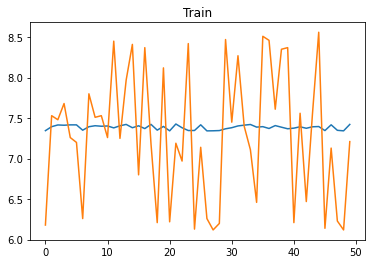

2/2 [==============================] - 1s 6ms/step


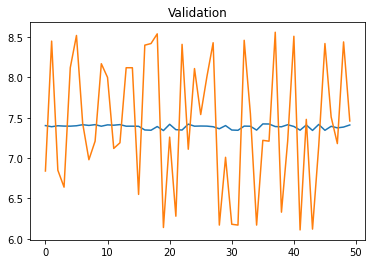

3/3 [==============================] - 0s 17ms/step


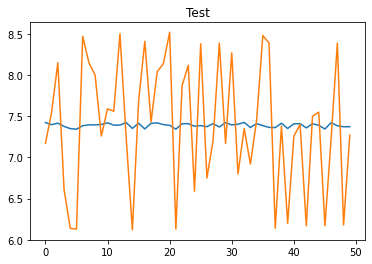

3/3 [==============================] - 0s 11ms/step


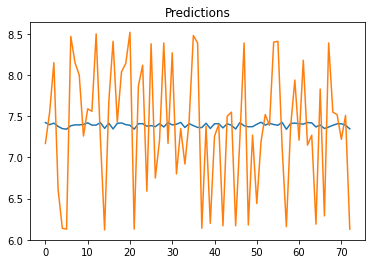

In [16]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 53.1479 - root_mean_squared_error: 7.2903

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 41s 4s/step - loss: 53.1598 - root_mean_squared_error: 7.2911 - val_loss: 51.6533 - val_root_mean_squared_error: 7.1870
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 52.2013 - root_mean_squared_error: 7.2250

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 52.1339 - root_mean_squared_error: 7.2204 - val_loss: 50.6730 - val_root_mean_squared_error: 7.1185
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 51.1450 - root_mean_squared_error: 7.1516

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 51.1450 - root_mean_squared_error: 7.1516 - val_loss: 49.7008 - val_root_mean_squared_error: 7.0499
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 50.1622 - root_mean_squared_error: 7.0825

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 50.1622 - root_mean_squared_error: 7.0825 - val_loss: 48.7430 - val_root_mean_squared_error: 6.9816
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 49.5202 - root_mean_squared_error: 7.0371

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 49.1974 - root_mean_squared_error: 7.0141 - val_loss: 47.7967 - val_root_mean_squared_error: 6.9135
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 48.2713 - root_mean_squared_error: 6.9478

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 48.2374 - root_mean_squared_error: 6.9453 - val_loss: 46.8443 - val_root_mean_squared_error: 6.8443
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 47.7042 - root_mean_squared_error: 6.9068

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 47.2705 - root_mean_squared_error: 6.8754 - val_loss: 45.8756 - val_root_mean_squared_error: 6.7732
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 46.2749 - root_mean_squared_error: 6.8026

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 46.2749 - root_mean_squared_error: 6.8026 - val_loss: 44.8811 - val_root_mean_squared_error: 6.6993
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 45.2491 - root_mean_squared_error: 6.7267

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 45.2491 - root_mean_squared_error: 6.7267 - val_loss: 43.8407 - val_root_mean_squared_error: 6.6212
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 43.9808 - root_mean_squared_error: 6.6318

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 44.1505 - root_mean_squared_error: 6.6446 - val_loss: 42.6789 - val_root_mean_squared_error: 6.5329
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 42.6733 - root_mean_squared_error: 6.5325

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 42.8868 - root_mean_squared_error: 6.5488 - val_loss: 41.3322 - val_root_mean_squared_error: 6.4290
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 41.6241 - root_mean_squared_error: 6.4517

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 41.4098 - root_mean_squared_error: 6.4350 - val_loss: 39.7237 - val_root_mean_squared_error: 6.3027
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 40.0119 - root_mean_squared_error: 6.3255

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 39.7127 - root_mean_squared_error: 6.3018 - val_loss: 38.0342 - val_root_mean_squared_error: 6.1672
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 38.0536 - root_mean_squared_error: 6.1688

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 38.0167 - root_mean_squared_error: 6.1658 - val_loss: 36.3679 - val_root_mean_squared_error: 6.0306
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 36.3038 - root_mean_squared_error: 6.0253

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 36.3038 - root_mean_squared_error: 6.0253 - val_loss: 34.6788 - val_root_mean_squared_error: 5.8889
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 34.5660 - root_mean_squared_error: 5.8793

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 34.5660 - root_mean_squared_error: 5.8793 - val_loss: 32.9277 - val_root_mean_squared_error: 5.7383
Epoch 17/50
4/8 [==============>...............] - ETA: 0s - loss: 32.7974 - root_mean_squared_error: 5.7269

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 32.7712 - root_mean_squared_error: 5.7246 - val_loss: 31.1491 - val_root_mean_squared_error: 5.5811
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 31.0140 - root_mean_squared_error: 5.5690

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 30.9537 - root_mean_squared_error: 5.5636 - val_loss: 29.3294 - val_root_mean_squared_error: 5.4157
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 29.4986 - root_mean_squared_error: 5.4313

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 29.1112 - root_mean_squared_error: 5.3955 - val_loss: 27.5392 - val_root_mean_squared_error: 5.2478
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 28.1433 - root_mean_squared_error: 5.3050

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 27.2948 - root_mean_squared_error: 5.2244 - val_loss: 25.7119 - val_root_mean_squared_error: 5.0707
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 25.8011 - root_mean_squared_error: 5.0795

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 25.4250 - root_mean_squared_error: 5.0423 - val_loss: 23.8974 - val_root_mean_squared_error: 4.8885
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 23.5783 - root_mean_squared_error: 4.8557

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 23.5783 - root_mean_squared_error: 4.8557 - val_loss: 22.0368 - val_root_mean_squared_error: 4.6943
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 21.6044 - root_mean_squared_error: 4.6481

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 21.6044 - root_mean_squared_error: 4.6481 - val_loss: 20.0131 - val_root_mean_squared_error: 4.4736
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 19.7150 - root_mean_squared_error: 4.4402

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 19.6259 - root_mean_squared_error: 4.4301 - val_loss: 18.1918 - val_root_mean_squared_error: 4.2652
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 17.8527 - root_mean_squared_error: 4.2252

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 17.8527 - root_mean_squared_error: 4.2252 - val_loss: 16.5737 - val_root_mean_squared_error: 4.0711
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 16.2795 - root_mean_squared_error: 4.0348

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 16.2795 - root_mean_squared_error: 4.0348 - val_loss: 15.1078 - val_root_mean_squared_error: 3.8869
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 14.8297 - root_mean_squared_error: 3.8509

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 14.8307 - root_mean_squared_error: 3.8511 - val_loss: 13.7371 - val_root_mean_squared_error: 3.7064
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 13.5005 - root_mean_squared_error: 3.6743

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 13.4872 - root_mean_squared_error: 3.6725 - val_loss: 12.4599 - val_root_mean_squared_error: 3.5299
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 12.5339 - root_mean_squared_error: 3.5403

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 12.2275 - root_mean_squared_error: 3.4968 - val_loss: 11.2807 - val_root_mean_squared_error: 3.3587
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 11.0609 - root_mean_squared_error: 3.3258

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 11.0586 - root_mean_squared_error: 3.3254 - val_loss: 10.1931 - val_root_mean_squared_error: 3.1927
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 9.9471 - root_mean_squared_error: 3.1539 

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 9.9862 - root_mean_squared_error: 3.1601 - val_loss: 9.1446 - val_root_mean_squared_error: 3.0240
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 8.9407 - root_mean_squared_error: 2.9901

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 8.9407 - root_mean_squared_error: 2.9901 - val_loss: 8.1944 - val_root_mean_squared_error: 2.8626
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 8.0287 - root_mean_squared_error: 2.8335

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 8.0287 - root_mean_squared_error: 2.8335 - val_loss: 7.3387 - val_root_mean_squared_error: 2.7090
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 7.2054 - root_mean_squared_error: 2.6843

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 7.1842 - root_mean_squared_error: 2.6803 - val_loss: 6.5411 - val_root_mean_squared_error: 2.5576
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 6.3626 - root_mean_squared_error: 2.5224

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 6.3757 - root_mean_squared_error: 2.5250 - val_loss: 5.7804 - val_root_mean_squared_error: 2.4043
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 5.6429 - root_mean_squared_error: 2.3755

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 5.6465 - root_mean_squared_error: 2.3762 - val_loss: 5.1282 - val_root_mean_squared_error: 2.2646
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 5.0095 - root_mean_squared_error: 2.2382

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 5.0095 - root_mean_squared_error: 2.2382 - val_loss: 4.5410 - val_root_mean_squared_error: 2.1310
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 4.4422 - root_mean_squared_error: 2.1077

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 4.4353 - root_mean_squared_error: 2.1060 - val_loss: 4.0114 - val_root_mean_squared_error: 2.0028
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 3.9009 - root_mean_squared_error: 1.9751

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 3.9009 - root_mean_squared_error: 1.9751 - val_loss: 3.4481 - val_root_mean_squared_error: 1.8569
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 3.3465 - root_mean_squared_error: 1.8294

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 3.3119 - root_mean_squared_error: 1.8199 - val_loss: 2.9637 - val_root_mean_squared_error: 1.7216
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2.8722 - root_mean_squared_error: 1.6947

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2.8884 - root_mean_squared_error: 1.6995 - val_loss: 2.6042 - val_root_mean_squared_error: 1.6137
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2.5397 - root_mean_squared_error: 1.5936

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2.5336 - root_mean_squared_error: 1.5917 - val_loss: 2.2721 - val_root_mean_squared_error: 1.5073
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2.1802 - root_mean_squared_error: 1.4765

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2.1933 - root_mean_squared_error: 1.4810 - val_loss: 1.9571 - val_root_mean_squared_error: 1.3990
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 1.8909 - root_mean_squared_error: 1.3751

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 1.8912 - root_mean_squared_error: 1.3752 - val_loss: 1.7003 - val_root_mean_squared_error: 1.3039
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 1.7719 - root_mean_squared_error: 1.3311

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 1.6560 - root_mean_squared_error: 1.2868 - val_loss: 1.5022 - val_root_mean_squared_error: 1.2256
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 1.4598 - root_mean_squared_error: 1.2082

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 1.4598 - root_mean_squared_error: 1.2082 - val_loss: 1.3385 - val_root_mean_squared_error: 1.1569
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3403 - root_mean_squared_error: 1.1577

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 1.2983 - root_mean_squared_error: 1.1394 - val_loss: 1.1953 - val_root_mean_squared_error: 1.0933
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 1.1542 - root_mean_squared_error: 1.0743

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 1.1542 - root_mean_squared_error: 1.0743 - val_loss: 1.0721 - val_root_mean_squared_error: 1.0354
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 1.0346 - root_mean_squared_error: 1.0171

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 1.0346 - root_mean_squared_error: 1.0171 - val_loss: 0.9693 - val_root_mean_squared_error: 0.9845
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9123 - root_mean_squared_error: 0.9551

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 3s 9ms/step


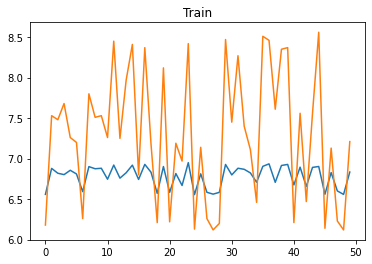

2/2 [==============================] - 3s 12ms/step


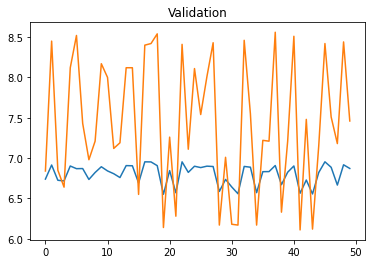

3/3 [==============================] - 0s 11ms/step


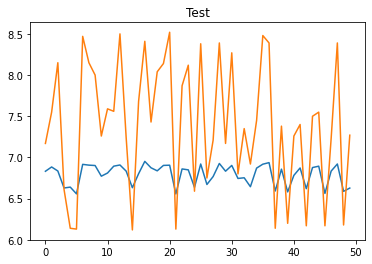

3/3 [==============================] - 0s 6ms/step


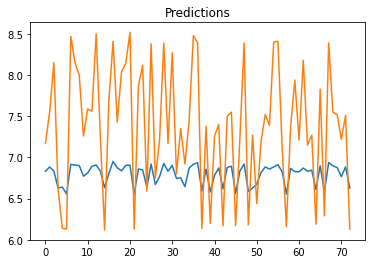

In [17]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/50
4/8 [==============>...............] - ETA: 0s - loss: 55.1126 - root_mean_squared_error: 7.4238 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 14s 1s/step - loss: 54.9163 - root_mean_squared_error: 7.4106 - val_loss: 51.1938 - val_root_mean_squared_error: 7.1550
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 50.7358 - root_mean_squared_error: 7.1229INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 20s 3s/step - loss: 50.1544 - root_mean_squared_error: 7.0820 - val_loss: 46.6146 - val_root_mean_squared_error: 6.8275
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 45.6785 - root_mean_squared_error: 6.7586INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 45.6207 - root_mean_squared_error: 6.7543 - val_loss: 42.3190 - val_root_mean_squared_error: 6.5053
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 41.4000 - root_mean_squared_error: 6.4343INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 928ms/step - loss: 41.4000 - root_mean_squared_error: 6.4343 - val_loss: 38.3178 - val_root_mean_squared_error: 6.1901
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 37.4890 - root_mean_squared_error: 6.1228INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 37.4890 - root_mean_squared_error: 6.1228 - val_loss: 34.6212 - val_root_mean_squared_error: 5.8840
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 34.3122 - root_mean_squared_error: 5.8577INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 996ms/step - loss: 33.8904 - root_mean_squared_error: 5.8215 - val_loss: 31.2365 - val_root_mean_squared_error: 5.5890
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 32.8829 - root_mean_squared_error: 5.7344INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 30.5907 - root_mean_squared_error: 5.5309 - val_loss: 28.1539 - val_root_mean_squared_error: 5.3060
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 27.5937 - root_mean_squared_error: 5.2530INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 27.5937 - root_mean_squared_error: 5.2530 - val_loss: 25.3613 - val_root_mean_squared_error: 5.0360
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 24.6748 - root_mean_squared_error: 4.9674INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 24.8725 - root_mean_squared_error: 4.9872 - val_loss: 22.8123 - val_root_mean_squared_error: 4.7762
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 22.4148 - root_mean_squared_error: 4.7344INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 22.3826 - root_mean_squared_error: 4.7310 - val_loss: 20.4695 - val_root_mean_squared_error: 4.5243
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 20.3841 - root_mean_squared_error: 4.5149INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 817ms/step - loss: 20.1039 - root_mean_squared_error: 4.4837 - val_loss: 18.3420 - val_root_mean_squared_error: 4.2828
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 18.1915 - root_mean_squared_error: 4.2651INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 18.0373 - root_mean_squared_error: 4.2470 - val_loss: 16.4092 - val_root_mean_squared_error: 4.0508
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 16.5014 - root_mean_squared_error: 4.0622INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 16.1503 - root_mean_squared_error: 4.0187 - val_loss: 14.6580 - val_root_mean_squared_error: 3.8286
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 14.9119 - root_mean_squared_error: 3.8616INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 14.4365 - root_mean_squared_error: 3.7995 - val_loss: 13.0612 - val_root_mean_squared_error: 3.6140
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 12.8698 - root_mean_squared_error: 3.5875INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 12.8698 - root_mean_squared_error: 3.5875 - val_loss: 11.6123 - val_root_mean_squared_error: 3.4077
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 11.4378 - root_mean_squared_error: 3.3820INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 11.4450 - root_mean_squared_error: 3.3831 - val_loss: 10.2880 - val_root_mean_squared_error: 3.2075
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 10.0950 - root_mean_squared_error: 3.1773INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 10.1430 - root_mean_squared_error: 3.1848 - val_loss: 9.0799 - val_root_mean_squared_error: 3.0133
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 8.9638 - root_mean_squared_error: 2.9940INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 8.9559 - root_mean_squared_error: 2.9926 - val_loss: 7.9876 - val_root_mean_squared_error: 2.8262
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 7.9520 - root_mean_squared_error: 2.8199INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 890ms/step - loss: 7.8799 - root_mean_squared_error: 2.8071 - val_loss: 7.0144 - val_root_mean_squared_error: 2.6485
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 7.0223 - root_mean_squared_error: 2.6500INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 863ms/step - loss: 6.9285 - root_mean_squared_error: 2.6322 - val_loss: 6.1445 - val_root_mean_squared_error: 2.4788
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 6.1484 - root_mean_squared_error: 2.4796INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 6.0731 - root_mean_squared_error: 2.4644 - val_loss: 5.3838 - val_root_mean_squared_error: 2.3203
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 5.3323 - root_mean_squared_error: 2.3092INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 5.3323 - root_mean_squared_error: 2.3092 - val_loss: 4.7152 - val_root_mean_squared_error: 2.1715
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 4.6765 - root_mean_squared_error: 2.1625INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 4.6732 - root_mean_squared_error: 2.1618 - val_loss: 4.1334 - val_root_mean_squared_error: 2.0331
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 4.0239 - root_mean_squared_error: 2.0060INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 4.0999 - root_mean_squared_error: 2.0248 - val_loss: 3.6274 - val_root_mean_squared_error: 1.9046
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 3.6035 - root_mean_squared_error: 1.8983INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 3.6035 - root_mean_squared_error: 1.8983 - val_loss: 3.1865 - val_root_mean_squared_error: 1.7851
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 3.1685 - root_mean_squared_error: 1.7800INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 3.1685 - root_mean_squared_error: 1.7800 - val_loss: 2.8009 - val_root_mean_squared_error: 1.6736
Epoch 27/50
5/8 [=================>............] - ETA: 0s - loss: 2.8571 - root_mean_squared_error: 1.6903INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2.7860 - root_mean_squared_error: 1.6691 - val_loss: 2.4694 - val_root_mean_squared_error: 1.5714
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2.4591 - root_mean_squared_error: 1.5682INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2.4555 - root_mean_squared_error: 1.5670 - val_loss: 2.1823 - val_root_mean_squared_error: 1.4772
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2.0105 - root_mean_squared_error: 1.4179INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2.1662 - root_mean_squared_error: 1.4718 - val_loss: 1.9351 - val_root_mean_squared_error: 1.3911
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 1.7592 - root_mean_squared_error: 1.3263INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 1.9214 - root_mean_squared_error: 1.3862 - val_loss: 1.7173 - val_root_mean_squared_error: 1.3105
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 1.5851 - root_mean_squared_error: 1.2590INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.7009 - root_mean_squared_error: 1.3042 - val_loss: 1.5331 - val_root_mean_squared_error: 1.2382
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 1.5207 - root_mean_squared_error: 1.2332INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.5207 - root_mean_squared_error: 1.2332 - val_loss: 1.3735 - val_root_mean_squared_error: 1.1720
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 1.3826 - root_mean_squared_error: 1.1758INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.3594 - root_mean_squared_error: 1.1659 - val_loss: 1.2424 - val_root_mean_squared_error: 1.1146
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 1.2469 - root_mean_squared_error: 1.1166INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.2279 - root_mean_squared_error: 1.1081 - val_loss: 1.1322 - val_root_mean_squared_error: 1.0641
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 1.0612 - root_mean_squared_error: 1.0302INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.1144 - root_mean_squared_error: 1.0556 - val_loss: 1.0409 - val_root_mean_squared_error: 1.0203
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 1.0546 - root_mean_squared_error: 1.0269INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.0231 - root_mean_squared_error: 1.0115 - val_loss: 0.9618 - val_root_mean_squared_error: 0.9807
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 0.9598 - root_mean_squared_error: 0.9797INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 704ms/step - loss: 0.9403 - root_mean_squared_error: 0.9697 - val_loss: 0.8939 - val_root_mean_squared_error: 0.9455
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 0.8894 - root_mean_squared_error: 0.9431INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 0.8693 - root_mean_squared_error: 0.9324 - val_loss: 0.8351 - val_root_mean_squared_error: 0.9139
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 0.8034 - root_mean_squared_error: 0.8963INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.8078 - root_mean_squared_error: 0.8988 - val_loss: 0.7878 - val_root_mean_squared_error: 0.8876
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7449 - root_mean_squared_error: 0.8631INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.7583 - root_mean_squared_error: 0.8708 - val_loss: 0.7468 - val_root_mean_squared_error: 0.8642
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 0.7204 - root_mean_squared_error: 0.8488INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.7140 - root_mean_squared_error: 0.8450 - val_loss: 0.7115 - val_root_mean_squared_error: 0.8435
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 0.6827 - root_mean_squared_error: 0.8263INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.6767 - root_mean_squared_error: 0.8226 - val_loss: 0.6822 - val_root_mean_squared_error: 0.8259
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 0.6435 - root_mean_squared_error: 0.8022INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 885ms/step - loss: 0.6435 - root_mean_squared_error: 0.8022 - val_loss: 0.6582 - val_root_mean_squared_error: 0.8113
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 0.6037 - root_mean_squared_error: 0.7770INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.6168 - root_mean_squared_error: 0.7853 - val_loss: 0.6376 - val_root_mean_squared_error: 0.7985
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5856 - root_mean_squared_error: 0.7652INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 0.5950 - root_mean_squared_error: 0.7713 - val_loss: 0.6206 - val_root_mean_squared_error: 0.7878
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 0.5602 - root_mean_squared_error: 0.7485INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.5747 - root_mean_squared_error: 0.7581 - val_loss: 0.6065 - val_root_mean_squared_error: 0.7788
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 0.5903 - root_mean_squared_error: 0.7683INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.5589 - root_mean_squared_error: 0.7476 - val_loss: 0.5944 - val_root_mean_squared_error: 0.7710
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 0.5460 - root_mean_squared_error: 0.7389INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.5460 - root_mean_squared_error: 0.7389 - val_loss: 0.5843 - val_root_mean_squared_error: 0.7644
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5256 - root_mean_squared_error: 0.7250INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.5329 - root_mean_squared_error: 0.7300 - val_loss: 0.5769 - val_root_mean_squared_error: 0.7596
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 0.5372 - root_mean_squared_error: 0.7329INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 4ms/step


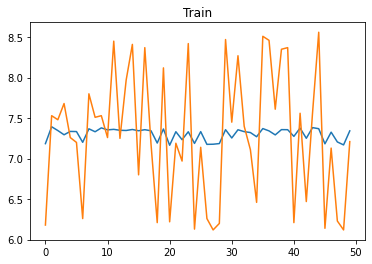

2/2 [==============================] - 1s 4ms/step


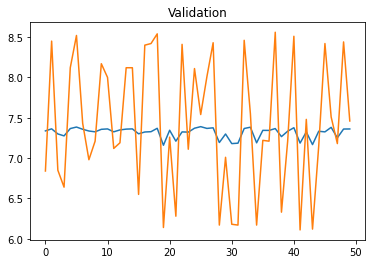

3/3 [==============================] - 0s 5ms/step


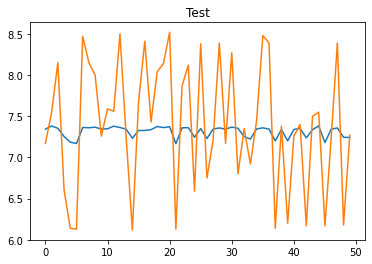

3/3 [==============================] - 0s 6ms/step


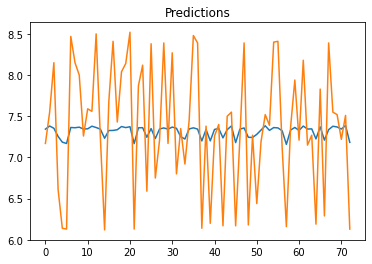

In [18]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [19]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/50
1/8 [==>...........................] - ETA: 22s - loss: 47637.6094 - root_mean_squared_error: 218.2604

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 12s 1s/step - loss: 27860.3574 - root_mean_squared_error: 166.9142 - val_loss: 12231.2520 - val_root_mean_squared_error: 110.5950
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 9062.8340 - root_mean_squared_error: 95.1989  

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 512ms/step - loss: 9015.4375 - root_mean_squared_error: 94.9497 - val_loss: 5479.9731 - val_root_mean_squared_error: 74.0268
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 4022.8708 - root_mean_squared_error: 63.4261

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 505ms/step - loss: 3737.9568 - root_mean_squared_error: 61.1388 - val_loss: 1805.7632 - val_root_mean_squared_error: 42.4943
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 1184.8622 - root_mean_squared_error: 34.4218

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 648ms/step - loss: 1078.2347 - root_mean_squared_error: 32.8365 - val_loss: 338.6213 - val_root_mean_squared_error: 18.4017
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 167.6033 - root_mean_squared_error: 12.9462

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 507ms/step - loss: 145.6047 - root_mean_squared_error: 12.0667 - val_loss: 15.0038 - val_root_mean_squared_error: 3.8735
Epoch 6/50
8/8 [==============================] - 0s 48ms/step - loss: 7.9083 - root_mean_squared_error: 2.8122 - val_loss: 20.5731 - val_root_mean_squared_error: 4.5358
Epoch 7/50
8/8 [==============================] - 0s 40ms/step - loss: 28.3518 - root_mean_squared_error: 5.3246 - val_loss: 35.3308 - val_root_mean_squared_error: 5.9440
Epoch 8/50
8/8 [==============================] - 0s 46ms/step - loss: 37.2650 - root_mean_squared_error: 6.1045 - val_loss: 33.4749 - val_root_mean_squared_error: 5.7858
Epoch 9/50
8/8 [==============================] - 0s 49ms/step - loss: 29.8384 - root_mean_squared_error: 5.4625 - val_loss: 23.6492 - val_root_mean_squared_error: 4.8630
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 17.0493 - root_mean_squared_error: 4.1291

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 584ms/step - loss: 16.9850 - root_mean_squared_error: 4.1213 - val_loss: 14.4915 - val_root_mean_squared_error: 3.8068
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 7.7090 - root_mean_squared_error: 2.7765 

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 581ms/step - loss: 7.7090 - root_mean_squared_error: 2.7765 - val_loss: 10.3877 - val_root_mean_squared_error: 3.2230
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 3.9038 - root_mean_squared_error: 1.9758

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 528ms/step - loss: 3.9038 - root_mean_squared_error: 1.9758 - val_loss: 9.8745 - val_root_mean_squared_error: 3.1424
Epoch 13/50
8/8 [==============================] - 0s 33ms/step - loss: 3.2920 - root_mean_squared_error: 1.8144 - val_loss: 10.1598 - val_root_mean_squared_error: 3.1874
Epoch 14/50
8/8 [==============================] - 0s 39ms/step - loss: 3.5172 - root_mean_squared_error: 1.8754 - val_loss: 10.2686 - val_root_mean_squared_error: 3.2045
Epoch 15/50
8/8 [==============================] - 0s 44ms/step - loss: 3.5401 - root_mean_squared_error: 1.8815 - val_loss: 10.1657 - val_root_mean_squared_error: 3.1884
Epoch 16/50
8/8 [==============================] - 0s 23ms/step - loss: 3.4265 - root_mean_squared_error: 1.8511 - val_loss: 10.0221 - val_root_mean_squared_error: 3.1658
Epoch 17/50
8/8 [==============================] - 0s 47ms/step - loss: 3.3279 - root_mean_squared_error: 1.8242 - val_loss: 9.9180 - val_root_mean_squared_e

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 508ms/step - loss: 3.3345 - root_mean_squared_error: 1.8261 - val_loss: 9.8644 - val_root_mean_squared_error: 3.1408
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 3.3015 - root_mean_squared_error: 1.8170

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 556ms/step - loss: 3.3388 - root_mean_squared_error: 1.8272 - val_loss: 9.8531 - val_root_mean_squared_error: 3.1390
Epoch 20/50
8/8 [==============================] - 0s 38ms/step - loss: 3.3366 - root_mean_squared_error: 1.8266 - val_loss: 9.8652 - val_root_mean_squared_error: 3.1409
Epoch 21/50
8/8 [==============================] - 0s 34ms/step - loss: 3.3224 - root_mean_squared_error: 1.8228 - val_loss: 9.8805 - val_root_mean_squared_error: 3.1433
Epoch 22/50
8/8 [==============================] - 0s 32ms/step - loss: 3.3205 - root_mean_squared_error: 1.8222 - val_loss: 9.9195 - val_root_mean_squared_error: 3.1495
Epoch 23/50
8/8 [==============================] - 0s 57ms/step - loss: 3.3211 - root_mean_squared_error: 1.8224 - val_loss: 9.9410 - val_root_mean_squared_error: 3.1529
Epoch 24/50
8/8 [==============================] - 0s 39ms/step - loss: 3.3250 - root_mean_squared_error: 1.8235 - val_loss: 9.9248 - val_root_mean_squared_error

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 517ms/step - loss: 3.3309 - root_mean_squared_error: 1.8251 - val_loss: 9.8350 - val_root_mean_squared_error: 3.1361
Epoch 29/50
8/8 [==============================] - 0s 41ms/step - loss: 3.3311 - root_mean_squared_error: 1.8251 - val_loss: 9.8426 - val_root_mean_squared_error: 3.1373
Epoch 30/50
8/8 [==============================] - 0s 22ms/step - loss: 3.3254 - root_mean_squared_error: 1.8236 - val_loss: 9.8853 - val_root_mean_squared_error: 3.1441
Epoch 31/50
8/8 [==============================] - 0s 54ms/step - loss: 3.3115 - root_mean_squared_error: 1.8198 - val_loss: 9.9022 - val_root_mean_squared_error: 3.1468
Epoch 32/50
8/8 [==============================] - 0s 38ms/step - loss: 3.3221 - root_mean_squared_error: 1.8227 - val_loss: 9.9325 - val_root_mean_squared_error: 3.1516
Epoch 33/50
8/8 [==============================] - 0s 21ms/step - loss: 3.3182 - root_mean_squared_error: 1.8216 - val_loss: 9.9078 - val_root_mean_squared_error

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 654ms/step - loss: 3.3300 - root_mean_squared_error: 1.8248 - val_loss: 9.8338 - val_root_mean_squared_error: 3.1359
Epoch 37/50
8/8 [==============================] - 0s 34ms/step - loss: 3.3120 - root_mean_squared_error: 1.8199 - val_loss: 9.8439 - val_root_mean_squared_error: 3.1375
Epoch 38/50
8/8 [==============================] - 0s 27ms/step - loss: 3.3083 - root_mean_squared_error: 1.8189 - val_loss: 9.8434 - val_root_mean_squared_error: 3.1374
Epoch 39/50
8/8 [==============================] - 0s 44ms/step - loss: 3.3179 - root_mean_squared_error: 1.8215 - val_loss: 9.8908 - val_root_mean_squared_error: 3.1450
Epoch 40/50
8/8 [==============================] - 0s 40ms/step - loss: 3.3104 - root_mean_squared_error: 1.8195 - val_loss: 9.8962 - val_root_mean_squared_error: 3.1458
Epoch 41/50
8/8 [==============================] - 0s 44ms/step - loss: 3.2999 - root_mean_squared_error: 1.8166 - val_loss: 9.8394 - val_root_mean_squared_error

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 386ms/step - loss: 3.2983 - root_mean_squared_error: 1.8161 - val_loss: 9.8215 - val_root_mean_squared_error: 3.1339
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 3.4720 - root_mean_squared_error: 1.8633

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 420ms/step - loss: 3.3096 - root_mean_squared_error: 1.8192 - val_loss: 9.7955 - val_root_mean_squared_error: 3.1298
Epoch 47/50
8/8 [==============================] - 0s 50ms/step - loss: 3.3024 - root_mean_squared_error: 1.8173 - val_loss: 9.8170 - val_root_mean_squared_error: 3.1332
Epoch 48/50
8/8 [==============================] - 0s 49ms/step - loss: 3.2932 - root_mean_squared_error: 1.8147 - val_loss: 9.8473 - val_root_mean_squared_error: 3.1380
Epoch 49/50
8/8 [==============================] - 0s 46ms/step - loss: 3.2966 - root_mean_squared_error: 1.8156 - val_loss: 9.8727 - val_root_mean_squared_error: 3.1421
Epoch 50/50
8/8 [==============================] - 1s 7ms/step


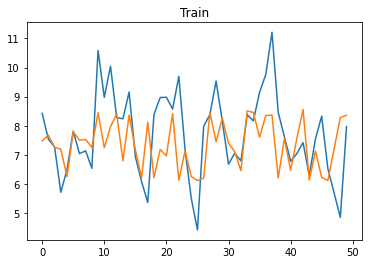

2/2 [==============================] - 1s 4ms/step


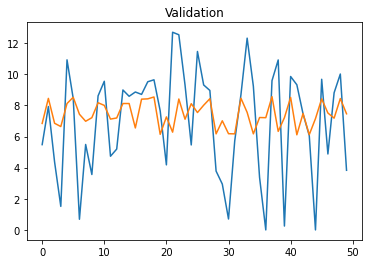

3/3 [==============================] - 0s 4ms/step


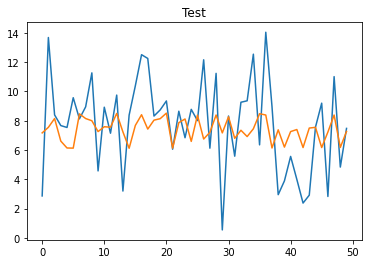

3/3 [==============================] - 0s 8ms/step


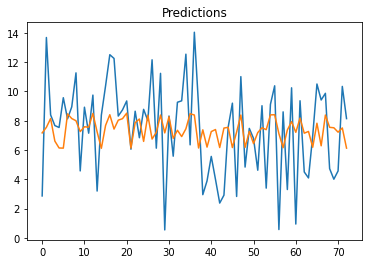

In [20]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 46.3417 - root_mean_squared_error: 6.8075

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 37s 3s/step - loss: 46.3417 - root_mean_squared_error: 6.8075 - val_loss: 44.0621 - val_root_mean_squared_error: 6.6379
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 43.9825 - root_mean_squared_error: 6.6319

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 43.9244 - root_mean_squared_error: 6.6276 - val_loss: 41.7093 - val_root_mean_squared_error: 6.4583
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 41.6113 - root_mean_squared_error: 6.4507

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 41.6113 - root_mean_squared_error: 6.4507 - val_loss: 39.5354 - val_root_mean_squared_error: 6.2877
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 39.4439 - root_mean_squared_error: 6.2804

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 39.4439 - root_mean_squared_error: 6.2804 - val_loss: 37.4512 - val_root_mean_squared_error: 6.1197
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 37.3428 - root_mean_squared_error: 6.1109

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 37.3428 - root_mean_squared_error: 6.1109 - val_loss: 35.4243 - val_root_mean_squared_error: 5.9518
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 35.8297 - root_mean_squared_error: 5.9858

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 35.2983 - root_mean_squared_error: 5.9412 - val_loss: 33.4026 - val_root_mean_squared_error: 5.7795
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 33.2661 - root_mean_squared_error: 5.7677

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 33.2217 - root_mean_squared_error: 5.7638 - val_loss: 31.3264 - val_root_mean_squared_error: 5.5970
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 31.3661 - root_mean_squared_error: 5.6005

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 31.1347 - root_mean_squared_error: 5.5798 - val_loss: 29.3356 - val_root_mean_squared_error: 5.4162
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 29.4131 - root_mean_squared_error: 5.4234

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 29.1622 - root_mean_squared_error: 5.4002 - val_loss: 27.4637 - val_root_mean_squared_error: 5.2406
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 27.2939 - root_mean_squared_error: 5.2244

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 27.2939 - root_mean_squared_error: 5.2244 - val_loss: 25.6554 - val_root_mean_squared_error: 5.0651
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 25.4765 - root_mean_squared_error: 5.0474

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 25.4765 - root_mean_squared_error: 5.0474 - val_loss: 23.9023 - val_root_mean_squared_error: 4.8890
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 23.7359 - root_mean_squared_error: 4.8719

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 23.7128 - root_mean_squared_error: 4.8696 - val_loss: 22.1887 - val_root_mean_squared_error: 4.7105
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 21.9818 - root_mean_squared_error: 4.6885

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 21.9818 - root_mean_squared_error: 4.6885 - val_loss: 20.5179 - val_root_mean_squared_error: 4.5297
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 20.5443 - root_mean_squared_error: 4.5326

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 20.3003 - root_mean_squared_error: 4.5056 - val_loss: 18.8690 - val_root_mean_squared_error: 4.3438
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 18.7306 - root_mean_squared_error: 4.3279

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 18.6237 - root_mean_squared_error: 4.3155 - val_loss: 17.2405 - val_root_mean_squared_error: 4.1522
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 17.1199 - root_mean_squared_error: 4.1376

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 17.0109 - root_mean_squared_error: 4.1244 - val_loss: 15.7223 - val_root_mean_squared_error: 3.9651
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 15.5915 - root_mean_squared_error: 3.9486

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 15.5090 - root_mean_squared_error: 3.9381 - val_loss: 14.2846 - val_root_mean_squared_error: 3.7795
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 14.0676 - root_mean_squared_error: 3.7507

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 14.0676 - root_mean_squared_error: 3.7507 - val_loss: 12.9102 - val_root_mean_squared_error: 3.5931
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 12.6851 - root_mean_squared_error: 3.5616

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 12.6868 - root_mean_squared_error: 3.5619 - val_loss: 11.5981 - val_root_mean_squared_error: 3.4056
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 11.4233 - root_mean_squared_error: 3.3798

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 11.3772 - root_mean_squared_error: 3.3730 - val_loss: 10.3464 - val_root_mean_squared_error: 3.2166
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 10.1729 - root_mean_squared_error: 3.1895

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 10.1317 - root_mean_squared_error: 3.1830 - val_loss: 9.1572 - val_root_mean_squared_error: 3.0261
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 9.0357 - root_mean_squared_error: 3.0059

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 8.9518 - root_mean_squared_error: 2.9920 - val_loss: 8.0527 - val_root_mean_squared_error: 2.8377
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 7.8577 - root_mean_squared_error: 2.8032

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 7.8577 - root_mean_squared_error: 2.8032 - val_loss: 7.0390 - val_root_mean_squared_error: 2.6531
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 6.9053 - root_mean_squared_error: 2.6278

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 6.8620 - root_mean_squared_error: 2.6195 - val_loss: 6.1049 - val_root_mean_squared_error: 2.4708
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 5.9422 - root_mean_squared_error: 2.4377

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 5.9422 - root_mean_squared_error: 2.4377 - val_loss: 5.2646 - val_root_mean_squared_error: 2.2945
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 5.1439 - root_mean_squared_error: 2.2680

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 5.1148 - root_mean_squared_error: 2.2616 - val_loss: 4.4957 - val_root_mean_squared_error: 2.1203
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 4.3325 - root_mean_squared_error: 2.0815

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 4.3451 - root_mean_squared_error: 2.0845 - val_loss: 3.7894 - val_root_mean_squared_error: 1.9466
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 3.6930 - root_mean_squared_error: 1.9217

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 3.6552 - root_mean_squared_error: 1.9119 - val_loss: 3.1767 - val_root_mean_squared_error: 1.7823
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 3.1025 - root_mean_squared_error: 1.7614

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 3.0691 - root_mean_squared_error: 1.7519 - val_loss: 2.6792 - val_root_mean_squared_error: 1.6368
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 2.6197 - root_mean_squared_error: 1.6185

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2.5913 - root_mean_squared_error: 1.6098 - val_loss: 2.2585 - val_root_mean_squared_error: 1.5028
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2.1886 - root_mean_squared_error: 1.4794

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2.1886 - root_mean_squared_error: 1.4794 - val_loss: 1.9019 - val_root_mean_squared_error: 1.3791
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 1.8529 - root_mean_squared_error: 1.3612

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 1.8401 - root_mean_squared_error: 1.3565 - val_loss: 1.6106 - val_root_mean_squared_error: 1.2691
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 1.5716 - root_mean_squared_error: 1.2536

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 1.5579 - root_mean_squared_error: 1.2481 - val_loss: 1.3723 - val_root_mean_squared_error: 1.1714
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 1.3065 - root_mean_squared_error: 1.1430

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 1.3205 - root_mean_squared_error: 1.1492 - val_loss: 1.1853 - val_root_mean_squared_error: 1.0887
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 1.1351 - root_mean_squared_error: 1.0654

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 1.1384 - root_mean_squared_error: 1.0670 - val_loss: 1.0328 - val_root_mean_squared_error: 1.0162
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 0.9925 - root_mean_squared_error: 0.9962

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 0.9925 - root_mean_squared_error: 0.9962 - val_loss: 0.9139 - val_root_mean_squared_error: 0.9560
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 0.8283 - root_mean_squared_error: 0.9101

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 0.8734 - root_mean_squared_error: 0.9345 - val_loss: 0.8247 - val_root_mean_squared_error: 0.9081
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7720 - root_mean_squared_error: 0.8786

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 0.7854 - root_mean_squared_error: 0.8862 - val_loss: 0.7582 - val_root_mean_squared_error: 0.8708
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 0.7198 - root_mean_squared_error: 0.8484

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 0.7198 - root_mean_squared_error: 0.8484 - val_loss: 0.7079 - val_root_mean_squared_error: 0.8414
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 0.6584 - root_mean_squared_error: 0.8114

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 0.6678 - root_mean_squared_error: 0.8172 - val_loss: 0.6733 - val_root_mean_squared_error: 0.8206
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 0.6335 - root_mean_squared_error: 0.7959

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 0.6315 - root_mean_squared_error: 0.7947 - val_loss: 0.6475 - val_root_mean_squared_error: 0.8047
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 0.6027 - root_mean_squared_error: 0.7763

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.6027 - root_mean_squared_error: 0.7763 - val_loss: 0.6303 - val_root_mean_squared_error: 0.7939
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 0.6016 - root_mean_squared_error: 0.7757

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 0.5860 - root_mean_squared_error: 0.7655 - val_loss: 0.6173 - val_root_mean_squared_error: 0.7857
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5678 - root_mean_squared_error: 0.7535

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 0.5697 - root_mean_squared_error: 0.7548 - val_loss: 0.6089 - val_root_mean_squared_error: 0.7803
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 0.5583 - root_mean_squared_error: 0.7472

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 0.5597 - root_mean_squared_error: 0.7481 - val_loss: 0.6022 - val_root_mean_squared_error: 0.7760
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 0.5509 - root_mean_squared_error: 0.7423

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.5509 - root_mean_squared_error: 0.7423 - val_loss: 0.5981 - val_root_mean_squared_error: 0.7733
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5371 - root_mean_squared_error: 0.7329

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 0.5452 - root_mean_squared_error: 0.7384 - val_loss: 0.5953 - val_root_mean_squared_error: 0.7715
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 0.5417 - root_mean_squared_error: 0.7360

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 0.5417 - root_mean_squared_error: 0.7360 - val_loss: 0.5936 - val_root_mean_squared_error: 0.7704
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5264 - root_mean_squared_error: 0.7255

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.5393 - root_mean_squared_error: 0.7344 - val_loss: 0.5925 - val_root_mean_squared_error: 0.7698
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5361 - root_mean_squared_error: 0.7322

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 3s 14ms/step


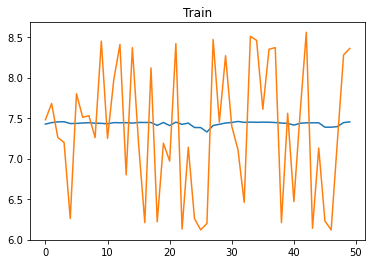

2/2 [==============================] - 3s 9ms/step


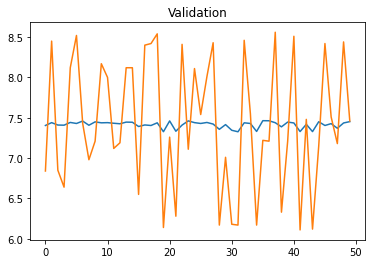

3/3 [==============================] - 0s 22ms/step


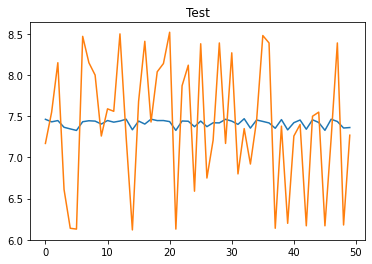

3/3 [==============================] - 0s 17ms/step


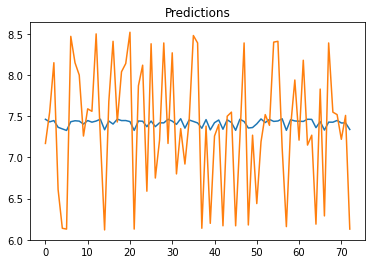

In [21]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 63.5050 - root_mean_squared_error: 7.9690

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 52s 5s/step - loss: 63.5050 - root_mean_squared_error: 7.9690 - val_loss: 61.3800 - val_root_mean_squared_error: 7.8345
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 62.1532 - root_mean_squared_error: 7.8837

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 61.7506 - root_mean_squared_error: 7.8582 - val_loss: 59.6810 - val_root_mean_squared_error: 7.7253
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 60.0498 - root_mean_squared_error: 7.7492

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 60.0498 - root_mean_squared_error: 7.7492 - val_loss: 58.0317 - val_root_mean_squared_error: 7.6179
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 58.4115 - root_mean_squared_error: 7.6427

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 58.3673 - root_mean_squared_error: 7.6398 - val_loss: 56.3515 - val_root_mean_squared_error: 7.5068
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 56.8995 - root_mean_squared_error: 7.5432

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 56.8063 - root_mean_squared_error: 7.5370 - val_loss: 55.5774 - val_root_mean_squared_error: 7.4550
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 56.4772 - root_mean_squared_error: 7.5151

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 56.4772 - root_mean_squared_error: 7.5151 - val_loss: 55.4103 - val_root_mean_squared_error: 7.4438
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 56.2707 - root_mean_squared_error: 7.5014

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 56.2778 - root_mean_squared_error: 7.5019 - val_loss: 55.1779 - val_root_mean_squared_error: 7.4282
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 55.9905 - root_mean_squared_error: 7.4827

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 56.0287 - root_mean_squared_error: 7.4852 - val_loss: 54.9132 - val_root_mean_squared_error: 7.4103
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 56.4820 - root_mean_squared_error: 7.5155

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 55.7512 - root_mean_squared_error: 7.4667 - val_loss: 54.6283 - val_root_mean_squared_error: 7.3911
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 55.4554 - root_mean_squared_error: 7.4468

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 55.4554 - root_mean_squared_error: 7.4468 - val_loss: 54.3275 - val_root_mean_squared_error: 7.3707
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 55.0508 - root_mean_squared_error: 7.4196

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 55.1449 - root_mean_squared_error: 7.4260 - val_loss: 54.0117 - val_root_mean_squared_error: 7.3493
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 54.8182 - root_mean_squared_error: 7.4039

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 54.8182 - root_mean_squared_error: 7.4039 - val_loss: 53.6788 - val_root_mean_squared_error: 7.3266
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 54.4740 - root_mean_squared_error: 7.3807

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 54.4740 - root_mean_squared_error: 7.3807 - val_loss: 53.3247 - val_root_mean_squared_error: 7.3024
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 54.0031 - root_mean_squared_error: 7.3487

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 54.1051 - root_mean_squared_error: 7.3556 - val_loss: 52.9405 - val_root_mean_squared_error: 7.2760
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 53.5806 - root_mean_squared_error: 7.3199

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 53.7077 - root_mean_squared_error: 7.3286 - val_loss: 52.5429 - val_root_mean_squared_error: 7.2486
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 53.3365 - root_mean_squared_error: 7.3032

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 53.3089 - root_mean_squared_error: 7.3013 - val_loss: 52.1490 - val_root_mean_squared_error: 7.2214
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 52.8500 - root_mean_squared_error: 7.2698

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 52.9050 - root_mean_squared_error: 7.2736 - val_loss: 51.7330 - val_root_mean_squared_error: 7.1926
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 52.5977 - root_mean_squared_error: 7.2524

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 52.4753 - root_mean_squared_error: 7.2440 - val_loss: 51.2937 - val_root_mean_squared_error: 7.1620
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 52.0178 - root_mean_squared_error: 7.2123

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 52.0178 - root_mean_squared_error: 7.2123 - val_loss: 50.8216 - val_root_mean_squared_error: 7.1289
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 51.6434 - root_mean_squared_error: 7.1863

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 51.5251 - root_mean_squared_error: 7.1781 - val_loss: 50.3084 - val_root_mean_squared_error: 7.0928
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 51.4054 - root_mean_squared_error: 7.1698

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 50.9923 - root_mean_squared_error: 7.1409 - val_loss: 49.7591 - val_root_mean_squared_error: 7.0540
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 51.2471 - root_mean_squared_error: 7.1587

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 50.1197 - root_mean_squared_error: 7.0795 - val_loss: 47.6810 - val_root_mean_squared_error: 6.9051
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 47.9752 - root_mean_squared_error: 6.9264

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 47.1046 - root_mean_squared_error: 6.8633 - val_loss: 43.8658 - val_root_mean_squared_error: 6.6231
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 42.8753 - root_mean_squared_error: 6.5479

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 42.8753 - root_mean_squared_error: 6.5479 - val_loss: 39.2713 - val_root_mean_squared_error: 6.2667
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 38.2057 - root_mean_squared_error: 6.1811

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 38.2057 - root_mean_squared_error: 6.1811 - val_loss: 34.7791 - val_root_mean_squared_error: 5.8974
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 33.7857 - root_mean_squared_error: 5.8125

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 33.8054 - root_mean_squared_error: 5.8142 - val_loss: 30.7238 - val_root_mean_squared_error: 5.5429
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 29.7396 - root_mean_squared_error: 5.4534

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 29.7396 - root_mean_squared_error: 5.4534 - val_loss: 26.7612 - val_root_mean_squared_error: 5.1731
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 26.0441 - root_mean_squared_error: 5.1033

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 26.0441 - root_mean_squared_error: 5.1033 - val_loss: 23.5956 - val_root_mean_squared_error: 4.8575
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 23.2583 - root_mean_squared_error: 4.8227

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 22.9643 - root_mean_squared_error: 4.7921 - val_loss: 20.7433 - val_root_mean_squared_error: 4.5545
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 20.3273 - root_mean_squared_error: 4.5086

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 20.1930 - root_mean_squared_error: 4.4937 - val_loss: 18.1634 - val_root_mean_squared_error: 4.2619
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 17.7268 - root_mean_squared_error: 4.2103

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 17.6639 - root_mean_squared_error: 4.2028 - val_loss: 15.8152 - val_root_mean_squared_error: 3.9768
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 15.3729 - root_mean_squared_error: 3.9208

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 15.3729 - root_mean_squared_error: 3.9208 - val_loss: 13.6686 - val_root_mean_squared_error: 3.6971
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 13.3057 - root_mean_squared_error: 3.6477

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 13.2689 - root_mean_squared_error: 3.6427 - val_loss: 11.7185 - val_root_mean_squared_error: 3.4232
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 11.3310 - root_mean_squared_error: 3.3662

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 11.3574 - root_mean_squared_error: 3.3701 - val_loss: 9.9205 - val_root_mean_squared_error: 3.1497
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 9.5258 - root_mean_squared_error: 3.0864

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 9.5859 - root_mean_squared_error: 3.0961 - val_loss: 8.2787 - val_root_mean_squared_error: 2.8773
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 7.9788 - root_mean_squared_error: 2.8247

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 7.9674 - root_mean_squared_error: 2.8227 - val_loss: 6.8000 - val_root_mean_squared_error: 2.6077
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 6.5678 - root_mean_squared_error: 2.5628

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 6.5428 - root_mean_squared_error: 2.5579 - val_loss: 5.5584 - val_root_mean_squared_error: 2.3576
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 5.3361 - root_mean_squared_error: 2.3100

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 5.3361 - root_mean_squared_error: 2.3100 - val_loss: 4.5224 - val_root_mean_squared_error: 2.1266
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 4.3297 - root_mean_squared_error: 2.0808

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 4.3297 - root_mean_squared_error: 2.0808 - val_loss: 3.6507 - val_root_mean_squared_error: 1.9107
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 3.5259 - root_mean_squared_error: 1.8777

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 3.5259 - root_mean_squared_error: 1.8777 - val_loss: 2.9524 - val_root_mean_squared_error: 1.7182
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2.8347 - root_mean_squared_error: 1.6837

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2.8736 - root_mean_squared_error: 1.6952 - val_loss: 2.3882 - val_root_mean_squared_error: 1.5454
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2.3380 - root_mean_squared_error: 1.5291

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2.3380 - root_mean_squared_error: 1.5291 - val_loss: 1.9421 - val_root_mean_squared_error: 1.3936
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 1.9188 - root_mean_squared_error: 1.3852

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 1.9188 - root_mean_squared_error: 1.3852 - val_loss: 1.5798 - val_root_mean_squared_error: 1.2569
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 1.6078 - root_mean_squared_error: 1.2680

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 1.5830 - root_mean_squared_error: 1.2582 - val_loss: 1.2954 - val_root_mean_squared_error: 1.1382
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3768 - root_mean_squared_error: 1.1734

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 1.3163 - root_mean_squared_error: 1.1473 - val_loss: 1.0816 - val_root_mean_squared_error: 1.0400
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 1.0948 - root_mean_squared_error: 1.0463

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 1.1094 - root_mean_squared_error: 1.0533 - val_loss: 0.9173 - val_root_mean_squared_error: 0.9578
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9426 - root_mean_squared_error: 0.9709

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 0.9516 - root_mean_squared_error: 0.9755 - val_loss: 0.7711 - val_root_mean_squared_error: 0.8781
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7760 - root_mean_squared_error: 0.8809

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 0.7704 - root_mean_squared_error: 0.8777 - val_loss: 0.5768 - val_root_mean_squared_error: 0.7595
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 0.5811 - root_mean_squared_error: 0.7623

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 0.5811 - root_mean_squared_error: 0.7623 - val_loss: 0.4906 - val_root_mean_squared_error: 0.7004
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 0.5214 - root_mean_squared_error: 0.7221

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 15ms/step


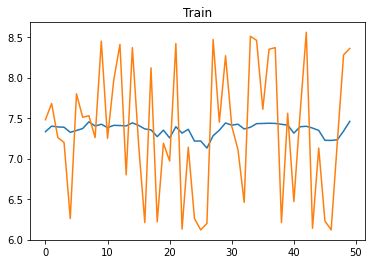

2/2 [==============================] - 2s 37ms/step


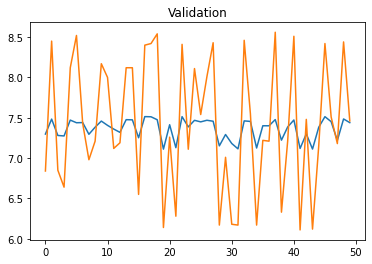

3/3 [==============================] - 0s 26ms/step


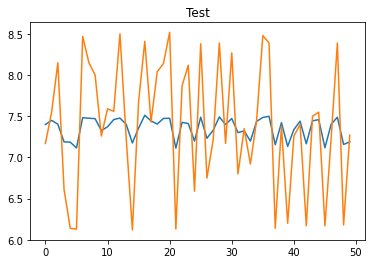

3/3 [==============================] - 0s 12ms/step


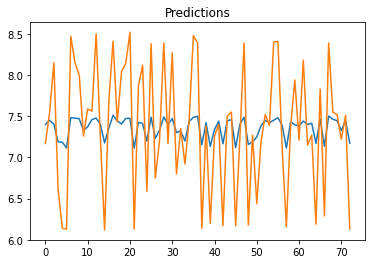

In [22]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 51.4838 - root_mean_squared_error: 7.1752INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 51.3721 - root_mean_squared_error: 7.1674 - val_loss: 47.4078 - val_root_mean_squared_error: 6.8853
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 46.0993 - root_mean_squared_error: 6.7896INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 19s 3s/step - loss: 45.9715 - root_mean_squared_error: 6.7802 - val_loss: 42.2808 - val_root_mean_squared_error: 6.5024
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 40.9420 - root_mean_squared_error: 6.3986INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 818ms/step - loss: 40.9420 - root_mean_squared_error: 6.3986 - val_loss: 37.5855 - val_root_mean_squared_error: 6.1307
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 36.6926 - root_mean_squared_error: 6.0574INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 36.3687 - root_mean_squared_error: 6.0306 - val_loss: 33.3159 - val_root_mean_squared_error: 5.7720
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 32.2230 - root_mean_squared_error: 5.6765INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 32.2230 - root_mean_squared_error: 5.6765 - val_loss: 29.4473 - val_root_mean_squared_error: 5.4265
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 28.4575 - root_mean_squared_error: 5.3346INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 28.4575 - root_mean_squared_error: 5.3346 - val_loss: 25.9409 - val_root_mean_squared_error: 5.0932
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 25.1317 - root_mean_squared_error: 5.0132INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 25.0324 - root_mean_squared_error: 5.0032 - val_loss: 22.7365 - val_root_mean_squared_error: 4.7683
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 22.0653 - root_mean_squared_error: 4.6974INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 21.9170 - root_mean_squared_error: 4.6816 - val_loss: 19.8620 - val_root_mean_squared_error: 4.4567
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 19.4525 - root_mean_squared_error: 4.4105INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 19.1511 - root_mean_squared_error: 4.3762 - val_loss: 17.2930 - val_root_mean_squared_error: 4.1585
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 16.6779 - root_mean_squared_error: 4.0839INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 16.6779 - root_mean_squared_error: 4.0839 - val_loss: 15.0209 - val_root_mean_squared_error: 3.8757
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 14.4925 - root_mean_squared_error: 3.8069INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 14.4925 - root_mean_squared_error: 3.8069 - val_loss: 13.0343 - val_root_mean_squared_error: 3.6103
Epoch 12/50
5/8 [=================>............] - ETA: 0s - loss: 12.9871 - root_mean_squared_error: 3.6038INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 12.5798 - root_mean_squared_error: 3.5468 - val_loss: 11.2602 - val_root_mean_squared_error: 3.3556
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 10.7051 - root_mean_squared_error: 3.2719INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 10.8528 - root_mean_squared_error: 3.2944 - val_loss: 9.6953 - val_root_mean_squared_error: 3.1137
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 9.3619 - root_mean_squared_error: 3.0597INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 9.3619 - root_mean_squared_error: 3.0597 - val_loss: 8.3084 - val_root_mean_squared_error: 2.8824
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 8.2437 - root_mean_squared_error: 2.8712INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 8.0191 - root_mean_squared_error: 2.8318 - val_loss: 7.0961 - val_root_mean_squared_error: 2.6639
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 6.8601 - root_mean_squared_error: 2.6192INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 6.8601 - root_mean_squared_error: 2.6192 - val_loss: 6.0335 - val_root_mean_squared_error: 2.4563
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 6.1151 - root_mean_squared_error: 2.4729INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 5.8395 - root_mean_squared_error: 2.4165 - val_loss: 5.1043 - val_root_mean_squared_error: 2.2593
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 5.0374 - root_mean_squared_error: 2.2444INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 988ms/step - loss: 4.9394 - root_mean_squared_error: 2.2225 - val_loss: 4.2989 - val_root_mean_squared_error: 2.0734
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 4.1708 - root_mean_squared_error: 2.0422INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 882ms/step - loss: 4.1708 - root_mean_squared_error: 2.0422 - val_loss: 3.6026 - val_root_mean_squared_error: 1.8981
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 3.4532 - root_mean_squared_error: 1.8583INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 3.4991 - root_mean_squared_error: 1.8706 - val_loss: 3.0112 - val_root_mean_squared_error: 1.7353
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2.9167 - root_mean_squared_error: 1.7078INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2.9303 - root_mean_squared_error: 1.7118 - val_loss: 2.4992 - val_root_mean_squared_error: 1.5809
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2.4669 - root_mean_squared_error: 1.5706INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2.4447 - root_mean_squared_error: 1.5636 - val_loss: 2.0726 - val_root_mean_squared_error: 1.4397
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2.0386 - root_mean_squared_error: 1.4278INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2.0386 - root_mean_squared_error: 1.4278 - val_loss: 1.7278 - val_root_mean_squared_error: 1.3145
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 1.7336 - root_mean_squared_error: 1.3167INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.7120 - root_mean_squared_error: 1.3084 - val_loss: 1.4428 - val_root_mean_squared_error: 1.2012
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 1.4545 - root_mean_squared_error: 1.2060INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.4469 - root_mean_squared_error: 1.2029 - val_loss: 1.2193 - val_root_mean_squared_error: 1.1042
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 1.2286 - root_mean_squared_error: 1.1084INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.2372 - root_mean_squared_error: 1.1123 - val_loss: 1.0431 - val_root_mean_squared_error: 1.0213
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 1.0780 - root_mean_squared_error: 1.0383INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.0736 - root_mean_squared_error: 1.0361 - val_loss: 0.9054 - val_root_mean_squared_error: 0.9515
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 1.0105 - root_mean_squared_error: 1.0053INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 0.9418 - root_mean_squared_error: 0.9705 - val_loss: 0.7952 - val_root_mean_squared_error: 0.8917
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 0.7766 - root_mean_squared_error: 0.8813INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.8351 - root_mean_squared_error: 0.9139 - val_loss: 0.7124 - val_root_mean_squared_error: 0.8440
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7422 - root_mean_squared_error: 0.8615INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 0.7538 - root_mean_squared_error: 0.8682 - val_loss: 0.6443 - val_root_mean_squared_error: 0.8027
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 0.6961 - root_mean_squared_error: 0.8343INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 0.6893 - root_mean_squared_error: 0.8302 - val_loss: 0.5901 - val_root_mean_squared_error: 0.7682
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 0.6436 - root_mean_squared_error: 0.8022INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.6379 - root_mean_squared_error: 0.7987 - val_loss: 0.5518 - val_root_mean_squared_error: 0.7428
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 0.5999 - root_mean_squared_error: 0.7745INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 991ms/step - loss: 0.5999 - root_mean_squared_error: 0.7745 - val_loss: 0.5241 - val_root_mean_squared_error: 0.7239
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 0.5728 - root_mean_squared_error: 0.7568INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 907ms/step - loss: 0.5728 - root_mean_squared_error: 0.7568 - val_loss: 0.5021 - val_root_mean_squared_error: 0.7086
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 0.5457 - root_mean_squared_error: 0.7387INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.5526 - root_mean_squared_error: 0.7434 - val_loss: 0.4859 - val_root_mean_squared_error: 0.6971
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 0.5363 - root_mean_squared_error: 0.7323INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.5363 - root_mean_squared_error: 0.7323 - val_loss: 0.4751 - val_root_mean_squared_error: 0.6893
Epoch 37/50
3/8 [==========>...................] - ETA: 0s - loss: 0.5125 - root_mean_squared_error: 0.7159INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 0.5264 - root_mean_squared_error: 0.7255 - val_loss: 0.4690 - val_root_mean_squared_error: 0.6848
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5135 - root_mean_squared_error: 0.7166INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.5205 - root_mean_squared_error: 0.7214 - val_loss: 0.4637 - val_root_mean_squared_error: 0.6809
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 0.5274 - root_mean_squared_error: 0.7262INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.5147 - root_mean_squared_error: 0.7174 - val_loss: 0.4608 - val_root_mean_squared_error: 0.6788
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 0.5167 - root_mean_squared_error: 0.7188INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.5112 - root_mean_squared_error: 0.7150 - val_loss: 0.4569 - val_root_mean_squared_error: 0.6760
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 0.4732 - root_mean_squared_error: 0.6879INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.5073 - root_mean_squared_error: 0.7123 - val_loss: 0.4538 - val_root_mean_squared_error: 0.6736
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5033 - root_mean_squared_error: 0.7094INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.5039 - root_mean_squared_error: 0.7098 - val_loss: 0.4521 - val_root_mean_squared_error: 0.6724
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 0.5065 - root_mean_squared_error: 0.7117INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.5020 - root_mean_squared_error: 0.7085 - val_loss: 0.4504 - val_root_mean_squared_error: 0.6711
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5038 - root_mean_squared_error: 0.7098INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 0.5011 - root_mean_squared_error: 0.7079 - val_loss: 0.4492 - val_root_mean_squared_error: 0.6702
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 0.4979 - root_mean_squared_error: 0.7057INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 0.4996 - root_mean_squared_error: 0.7068 - val_loss: 0.4480 - val_root_mean_squared_error: 0.6693
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 0.4684 - root_mean_squared_error: 0.6844INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.4983 - root_mean_squared_error: 0.7059 - val_loss: 0.4470 - val_root_mean_squared_error: 0.6686
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 0.4977 - root_mean_squared_error: 0.7055INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.4977 - root_mean_squared_error: 0.7055 - val_loss: 0.4461 - val_root_mean_squared_error: 0.6679
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 0.4969 - root_mean_squared_error: 0.7049INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 0.4969 - root_mean_squared_error: 0.7049 - val_loss: 0.4453 - val_root_mean_squared_error: 0.6673
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 0.4963 - root_mean_squared_error: 0.7045INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.4963 - root_mean_squared_error: 0.7045 - val_loss: 0.4446 - val_root_mean_squared_error: 0.6668
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 0.4961 - root_mean_squared_error: 0.7043INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 5ms/step


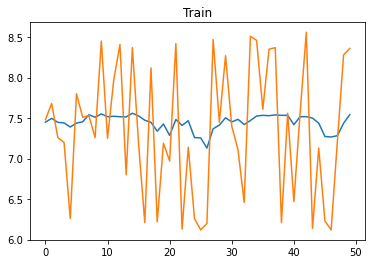

2/2 [==============================] - 1s 5ms/step


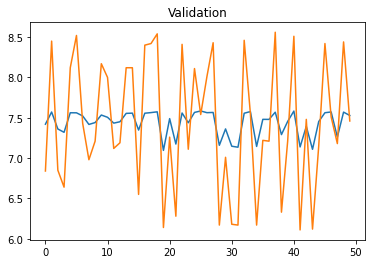

3/3 [==============================] - 0s 5ms/step


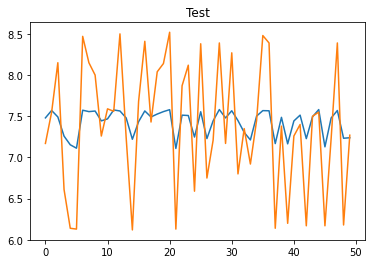

3/3 [==============================] - 0s 5ms/step


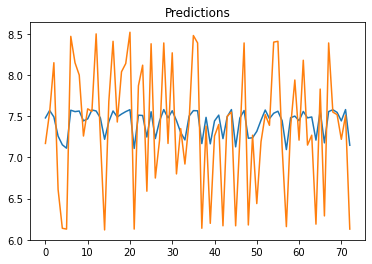

In [23]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 47036.6211 - root_mean_squared_error: 216.8793

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 10s 875ms/step - loss: 43611.4844 - root_mean_squared_error: 208.8336 - val_loss: 3741.4009 - val_root_mean_squared_error: 61.1670
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 20125.9590 - root_mean_squared_error: 141.8660

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 16287.9600 - root_mean_squared_error: 127.6243 - val_loss: 1273.6213 - val_root_mean_squared_error: 35.6878
Epoch 3/50
8/8 [==============================] - 1s 63ms/step - loss: 5011.0981 - root_mean_squared_error: 70.7891 - val_loss: 3773.1069 - val_root_mean_squared_error: 61.4256
Epoch 4/50
8/8 [==============================] - 0s 51ms/step - loss: 4999.4268 - root_mean_squared_error: 70.7066 - val_loss: 4206.0000 - val_root_mean_squared_error: 64.8537
Epoch 5/50
8/8 [==============================] - 0s 37ms/step - loss: 5257.8638 - root_mean_squared_error: 72.5111 - val_loss: 3504.4561 - val_root_mean_squared_error: 59.1984
Epoch 6/50
8/8 [==============================] - 0s 40ms/step - loss: 3767.5261 - root_mean_squared_error: 61.3802 - val_loss: 2332.3831 - val_root_mean_squared_error: 48.2948
Epoch 7/50
8/8 [==============================] - 0s 35ms/step - loss: 3090.2458 - root_mean_squared_error: 55.5900 - val_loss

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 931ms/step - loss: 2486.3704 - root_mean_squared_error: 49.8635 - val_loss: 783.5292 - val_root_mean_squared_error: 27.9916
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2004.8860 - root_mean_squared_error: 44.7760

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 887ms/step - loss: 2004.8860 - root_mean_squared_error: 44.7760 - val_loss: 439.6076 - val_root_mean_squared_error: 20.9668
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2244.8020 - root_mean_squared_error: 47.3793

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 881ms/step - loss: 2266.8828 - root_mean_squared_error: 47.6118 - val_loss: 233.5432 - val_root_mean_squared_error: 15.2821
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2140.5886 - root_mean_squared_error: 46.2665

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 881ms/step - loss: 2140.5886 - root_mean_squared_error: 46.2665 - val_loss: 178.6145 - val_root_mean_squared_error: 13.3647
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 1576.3390 - root_mean_squared_error: 39.7031

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 15s 2s/step - loss: 1436.6854 - root_mean_squared_error: 37.9036 - val_loss: 152.9709 - val_root_mean_squared_error: 12.3681
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 1132.1506 - root_mean_squared_error: 33.6474

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 892ms/step - loss: 1356.0698 - root_mean_squared_error: 36.8249 - val_loss: 129.0708 - val_root_mean_squared_error: 11.3609
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 1363.1501 - root_mean_squared_error: 36.9209

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 746ms/step - loss: 1355.2908 - root_mean_squared_error: 36.8143 - val_loss: 113.4340 - val_root_mean_squared_error: 10.6505
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 1414.3730 - root_mean_squared_error: 37.6082

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1393.4202 - root_mean_squared_error: 37.3285 - val_loss: 97.7942 - val_root_mean_squared_error: 9.8891
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 1264.3488 - root_mean_squared_error: 35.5577

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 907ms/step - loss: 1258.4248 - root_mean_squared_error: 35.4743 - val_loss: 76.4199 - val_root_mean_squared_error: 8.7418
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 929.8178 - root_mean_squared_error: 30.4929

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 771ms/step - loss: 990.0898 - root_mean_squared_error: 31.4657 - val_loss: 56.0320 - val_root_mean_squared_error: 7.4854
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 836.0526 - root_mean_squared_error: 28.9146

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 823ms/step - loss: 820.2035 - root_mean_squared_error: 28.6392 - val_loss: 43.1637 - val_root_mean_squared_error: 6.5699
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 742.8566 - root_mean_squared_error: 27.2554

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 816ms/step - loss: 742.8566 - root_mean_squared_error: 27.2554 - val_loss: 30.6327 - val_root_mean_squared_error: 5.5347
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 800.5976 - root_mean_squared_error: 28.2948

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 855ms/step - loss: 769.5573 - root_mean_squared_error: 27.7409 - val_loss: 20.8336 - val_root_mean_squared_error: 4.5644
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 657.0381 - root_mean_squared_error: 25.6328

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 993ms/step - loss: 705.0204 - root_mean_squared_error: 26.5522 - val_loss: 15.5268 - val_root_mean_squared_error: 3.9404
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 715.0457 - root_mean_squared_error: 26.7403

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 13s 2s/step - loss: 637.8701 - root_mean_squared_error: 25.2561 - val_loss: 11.2525 - val_root_mean_squared_error: 3.3545
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 537.9631 - root_mean_squared_error: 23.1940

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 537.9631 - root_mean_squared_error: 23.1940 - val_loss: 7.2642 - val_root_mean_squared_error: 2.6952
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 664.8137 - root_mean_squared_error: 25.7840

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 740ms/step - loss: 664.8137 - root_mean_squared_error: 25.7840 - val_loss: 3.3504 - val_root_mean_squared_error: 1.8304
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 461.6136 - root_mean_squared_error: 21.4852

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 466.1051 - root_mean_squared_error: 21.5895 - val_loss: 1.8736 - val_root_mean_squared_error: 1.3688
Epoch 26/50
8/8 [==============================] - 0s 52ms/step - loss: 565.9669 - root_mean_squared_error: 23.7901 - val_loss: 2.4118 - val_root_mean_squared_error: 1.5530
Epoch 27/50
8/8 [==============================] - 0s 44ms/step - loss: 784.7927 - root_mean_squared_error: 28.0142 - val_loss: 4.0361 - val_root_mean_squared_error: 2.0090
Epoch 28/50
8/8 [==============================] - 0s 34ms/step - loss: 502.4104 - root_mean_squared_error: 22.4145 - val_loss: 7.5261 - val_root_mean_squared_error: 2.7434
Epoch 29/50
8/8 [==============================] - 0s 46ms/step - loss: 696.4626 - root_mean_squared_error: 26.3906 - val_loss: 11.5135 - val_root_mean_squared_error: 3.3932
Epoch 30/50
8/8 [==============================] - 0s 44ms/step - loss: 392.5975 - root_mean_squared_error: 19.8141 - val_loss: 16.0514 - val_root_m

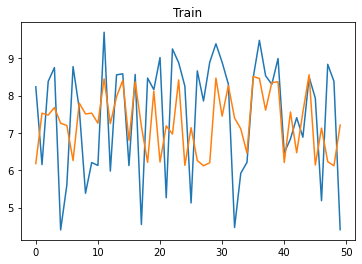

2/2 [==============================] - 1s 6ms/step


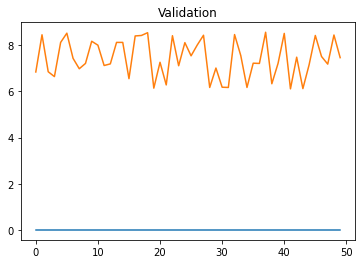

3/3 [==============================] - 0s 4ms/step


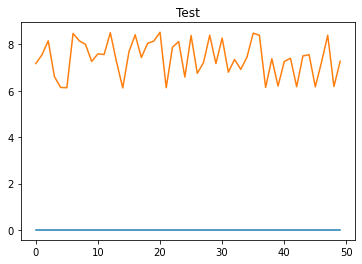

3/3 [==============================] - 0s 27ms/step


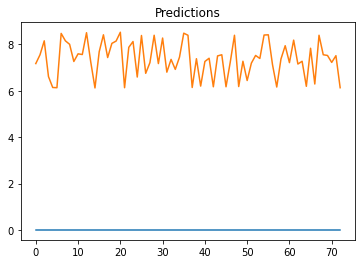

In [24]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [25]:
auto_cnn_mse

54.915866786402866

### GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 39.4038 - root_mean_squared_error: 6.2772

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 42s 4s/step - loss: 39.4943 - root_mean_squared_error: 6.2844 - val_loss: 36.9003 - val_root_mean_squared_error: 6.0746
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 36.5884 - root_mean_squared_error: 6.0488

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 36.5884 - root_mean_squared_error: 6.0488 - val_loss: 34.1337 - val_root_mean_squared_error: 5.8424
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 34.8142 - root_mean_squared_error: 5.9004

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 34.3708 - root_mean_squared_error: 5.8627 - val_loss: 31.5110 - val_root_mean_squared_error: 5.6135
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 31.1636 - root_mean_squared_error: 5.5824

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 31.0733 - root_mean_squared_error: 5.5743 - val_loss: 28.9999 - val_root_mean_squared_error: 5.3852
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 28.8766 - root_mean_squared_error: 5.3737

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 28.8766 - root_mean_squared_error: 5.3737 - val_loss: 26.6086 - val_root_mean_squared_error: 5.1584
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 26.5771 - root_mean_squared_error: 5.1553

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 26.5771 - root_mean_squared_error: 5.1553 - val_loss: 24.3249 - val_root_mean_squared_error: 4.9320
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 23.9379 - root_mean_squared_error: 4.8926

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 23.9379 - root_mean_squared_error: 4.8926 - val_loss: 22.1398 - val_root_mean_squared_error: 4.7053
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 21.8201 - root_mean_squared_error: 4.6712

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 21.8201 - root_mean_squared_error: 4.6712 - val_loss: 20.0505 - val_root_mean_squared_error: 4.4778
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 20.0002 - root_mean_squared_error: 4.4722

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 20.0002 - root_mean_squared_error: 4.4722 - val_loss: 18.0832 - val_root_mean_squared_error: 4.2524
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 17.7931 - root_mean_squared_error: 4.2182

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 17.9234 - root_mean_squared_error: 4.2336 - val_loss: 16.2258 - val_root_mean_squared_error: 4.0281
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 16.1716 - root_mean_squared_error: 4.0214

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 16.1360 - root_mean_squared_error: 4.0170 - val_loss: 14.4619 - val_root_mean_squared_error: 3.8029
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 14.2456 - root_mean_squared_error: 3.7743

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 14.2268 - root_mean_squared_error: 3.7718 - val_loss: 12.8193 - val_root_mean_squared_error: 3.5804
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 12.7838 - root_mean_squared_error: 3.5754

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 12.6913 - root_mean_squared_error: 3.5625 - val_loss: 11.2942 - val_root_mean_squared_error: 3.3607
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 11.0394 - root_mean_squared_error: 3.3226

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 11.0398 - root_mean_squared_error: 3.3226 - val_loss: 9.8924 - val_root_mean_squared_error: 3.1452
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 9.7546 - root_mean_squared_error: 3.1232 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 9.7021 - root_mean_squared_error: 3.1148 - val_loss: 8.6063 - val_root_mean_squared_error: 2.9337
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 8.4611 - root_mean_squared_error: 2.9088

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 8.3750 - root_mean_squared_error: 2.8940 - val_loss: 7.4498 - val_root_mean_squared_error: 2.7294
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 7.5048 - root_mean_squared_error: 2.7395

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 7.5453 - root_mean_squared_error: 2.7469 - val_loss: 6.4192 - val_root_mean_squared_error: 2.5336
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 6.6302 - root_mean_squared_error: 2.5749

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 6.6302 - root_mean_squared_error: 2.5749 - val_loss: 5.4847 - val_root_mean_squared_error: 2.3419
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 5.7569 - root_mean_squared_error: 2.3994

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 5.7570 - root_mean_squared_error: 2.3994 - val_loss: 4.6654 - val_root_mean_squared_error: 2.1599
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 4.6517 - root_mean_squared_error: 2.1568

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 4.6367 - root_mean_squared_error: 2.1533 - val_loss: 3.9550 - val_root_mean_squared_error: 1.9887
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 4.1458 - root_mean_squared_error: 2.0361

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 4.1458 - root_mean_squared_error: 2.0361 - val_loss: 3.3527 - val_root_mean_squared_error: 1.8310
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 3.3737 - root_mean_squared_error: 1.8368

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 3.3994 - root_mean_squared_error: 1.8438 - val_loss: 2.8464 - val_root_mean_squared_error: 1.6871
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 3.1708 - root_mean_squared_error: 1.7807

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 3.1708 - root_mean_squared_error: 1.7807 - val_loss: 2.4192 - val_root_mean_squared_error: 1.5554
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2.5413 - root_mean_squared_error: 1.5941

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 2.5070 - root_mean_squared_error: 1.5834 - val_loss: 2.0668 - val_root_mean_squared_error: 1.4376
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2.4363 - root_mean_squared_error: 1.5609

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2.3734 - root_mean_squared_error: 1.5406 - val_loss: 1.7748 - val_root_mean_squared_error: 1.3322
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2.0420 - root_mean_squared_error: 1.4290

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 1.9791 - root_mean_squared_error: 1.4068 - val_loss: 1.5383 - val_root_mean_squared_error: 1.2403
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 1.9320 - root_mean_squared_error: 1.3900

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 1.9320 - root_mean_squared_error: 1.3900 - val_loss: 1.3439 - val_root_mean_squared_error: 1.1593
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 1.5556 - root_mean_squared_error: 1.2472

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 1.5556 - root_mean_squared_error: 1.2472 - val_loss: 1.1908 - val_root_mean_squared_error: 1.0913
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 1.5036 - root_mean_squared_error: 1.2262

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 1.5015 - root_mean_squared_error: 1.2254 - val_loss: 1.0711 - val_root_mean_squared_error: 1.0350
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 1.4114 - root_mean_squared_error: 1.1880

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 1.3390 - root_mean_squared_error: 1.1571 - val_loss: 0.9779 - val_root_mean_squared_error: 0.9889
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 1.2017 - root_mean_squared_error: 1.0962

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 1.1702 - root_mean_squared_error: 1.0818 - val_loss: 0.9061 - val_root_mean_squared_error: 0.9519
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 1.2407 - root_mean_squared_error: 1.1139

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 1.2407 - root_mean_squared_error: 1.1139 - val_loss: 0.8500 - val_root_mean_squared_error: 0.9219
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 1.1394 - root_mean_squared_error: 1.0674

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 1.1394 - root_mean_squared_error: 1.0674 - val_loss: 0.8030 - val_root_mean_squared_error: 0.8961
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 1.1294 - root_mean_squared_error: 1.0627

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 1.1056 - root_mean_squared_error: 1.0515 - val_loss: 0.7667 - val_root_mean_squared_error: 0.8756
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 0.9186 - root_mean_squared_error: 0.9584

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 0.9456 - root_mean_squared_error: 0.9724 - val_loss: 0.7421 - val_root_mean_squared_error: 0.8615
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 1.0018 - root_mean_squared_error: 1.0009

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 1.0140 - root_mean_squared_error: 1.0070 - val_loss: 0.7203 - val_root_mean_squared_error: 0.8487
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 0.9705 - root_mean_squared_error: 0.9851

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 0.9705 - root_mean_squared_error: 0.9851 - val_loss: 0.7040 - val_root_mean_squared_error: 0.8391
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 1.0029 - root_mean_squared_error: 1.0014

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 0.9627 - root_mean_squared_error: 0.9811 - val_loss: 0.6912 - val_root_mean_squared_error: 0.8314
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9704 - root_mean_squared_error: 0.9851

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 0.9727 - root_mean_squared_error: 0.9863 - val_loss: 0.6813 - val_root_mean_squared_error: 0.8254
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 0.9200 - root_mean_squared_error: 0.9592

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 0.9318 - root_mean_squared_error: 0.9653 - val_loss: 0.6729 - val_root_mean_squared_error: 0.8203
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 0.9798 - root_mean_squared_error: 0.9899

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 0.9798 - root_mean_squared_error: 0.9899 - val_loss: 0.6657 - val_root_mean_squared_error: 0.8159
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 0.9019 - root_mean_squared_error: 0.9497

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 0.9019 - root_mean_squared_error: 0.9497 - val_loss: 0.6590 - val_root_mean_squared_error: 0.8118
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 0.9039 - root_mean_squared_error: 0.9507

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 0.9039 - root_mean_squared_error: 0.9507 - val_loss: 0.6538 - val_root_mean_squared_error: 0.8086
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 0.8535 - root_mean_squared_error: 0.9238

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 0.8325 - root_mean_squared_error: 0.9124 - val_loss: 0.6497 - val_root_mean_squared_error: 0.8060
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 0.9309 - root_mean_squared_error: 0.9648

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 0.8752 - root_mean_squared_error: 0.9355 - val_loss: 0.6459 - val_root_mean_squared_error: 0.8037
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9096 - root_mean_squared_error: 0.9537

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 0.9326 - root_mean_squared_error: 0.9657 - val_loss: 0.6428 - val_root_mean_squared_error: 0.8018
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8454 - root_mean_squared_error: 0.9194

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.8536 - root_mean_squared_error: 0.9239 - val_loss: 0.6399 - val_root_mean_squared_error: 0.7999
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8205 - root_mean_squared_error: 0.9058

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.8583 - root_mean_squared_error: 0.9264 - val_loss: 0.6369 - val_root_mean_squared_error: 0.7980
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8731 - root_mean_squared_error: 0.9344

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 0.8926 - root_mean_squared_error: 0.9448 - val_loss: 0.6337 - val_root_mean_squared_error: 0.7960
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 0.8118 - root_mean_squared_error: 0.9010

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 4s 8ms/step


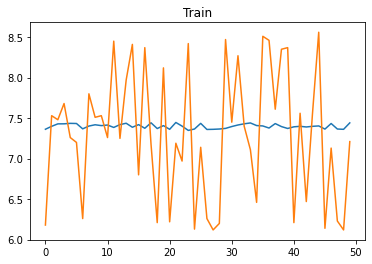

2/2 [==============================] - 3s 9ms/step


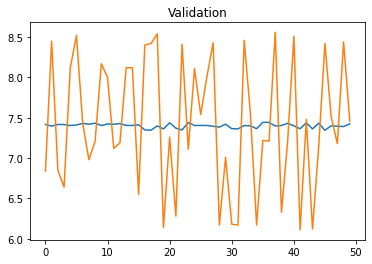

3/3 [==============================] - 0s 6ms/step


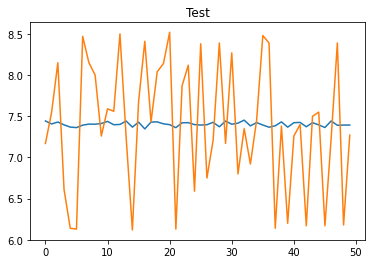

3/3 [==============================] - 1s 231ms/step


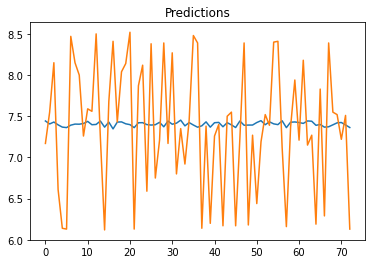

In [26]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [27]:
auto_gru_mse

0.561410940457602

### LSTM

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 71.1681 - root_mean_squared_error: 8.4361

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 58s 4s/step - loss: 70.9157 - root_mean_squared_error: 8.4211 - val_loss: 67.8804 - val_root_mean_squared_error: 8.2390
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 67.8663 - root_mean_squared_error: 8.2381

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 68.0059 - root_mean_squared_error: 8.2466 - val_loss: 65.3868 - val_root_mean_squared_error: 8.0862
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 65.8847 - root_mean_squared_error: 8.1169

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 65.8847 - root_mean_squared_error: 8.1169 - val_loss: 63.5183 - val_root_mean_squared_error: 7.9698
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 63.9343 - root_mean_squared_error: 7.9959

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 63.9343 - root_mean_squared_error: 7.9959 - val_loss: 61.8188 - val_root_mean_squared_error: 7.8625
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 62.6565 - root_mean_squared_error: 7.9156

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 62.1925 - root_mean_squared_error: 7.8862 - val_loss: 59.9067 - val_root_mean_squared_error: 7.7399
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 60.2383 - root_mean_squared_error: 7.7613

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 60.1151 - root_mean_squared_error: 7.7534 - val_loss: 57.1318 - val_root_mean_squared_error: 7.5586
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 58.6124 - root_mean_squared_error: 7.6559

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 58.4362 - root_mean_squared_error: 7.6444 - val_loss: 55.4906 - val_root_mean_squared_error: 7.4492
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 56.3741 - root_mean_squared_error: 7.5083

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 56.4449 - root_mean_squared_error: 7.5130 - val_loss: 53.9190 - val_root_mean_squared_error: 7.3430
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 54.9528 - root_mean_squared_error: 7.4130

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 54.8639 - root_mean_squared_error: 7.4070 - val_loss: 51.8226 - val_root_mean_squared_error: 7.1988
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 53.7452 - root_mean_squared_error: 7.3311

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 53.7452 - root_mean_squared_error: 7.3311 - val_loss: 51.1221 - val_root_mean_squared_error: 7.1500
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 52.5217 - root_mean_squared_error: 7.2472

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 52.5817 - root_mean_squared_error: 7.2513 - val_loss: 50.4343 - val_root_mean_squared_error: 7.1017
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 51.5589 - root_mean_squared_error: 7.1804

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 51.5589 - root_mean_squared_error: 7.1804 - val_loss: 49.4322 - val_root_mean_squared_error: 7.0308
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 50.8003 - root_mean_squared_error: 7.1274

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 50.7837 - root_mean_squared_error: 7.1263 - val_loss: 47.9229 - val_root_mean_squared_error: 6.9226
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 49.3164 - root_mean_squared_error: 7.0226

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 48.9821 - root_mean_squared_error: 6.9987 - val_loss: 46.3464 - val_root_mean_squared_error: 6.8078
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 47.7422 - root_mean_squared_error: 6.9096

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 47.5997 - root_mean_squared_error: 6.8993 - val_loss: 44.7553 - val_root_mean_squared_error: 6.6899
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 46.1245 - root_mean_squared_error: 6.7915

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 46.1245 - root_mean_squared_error: 6.7915 - val_loss: 43.0800 - val_root_mean_squared_error: 6.5635
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 44.4310 - root_mean_squared_error: 6.6657

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 44.4310 - root_mean_squared_error: 6.6657 - val_loss: 41.3348 - val_root_mean_squared_error: 6.4292
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 42.2340 - root_mean_squared_error: 6.4988

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 42.1504 - root_mean_squared_error: 6.4923 - val_loss: 39.3866 - val_root_mean_squared_error: 6.2759
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 40.0242 - root_mean_squared_error: 6.3265

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 40.6068 - root_mean_squared_error: 6.3723 - val_loss: 37.4429 - val_root_mean_squared_error: 6.1191
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 38.5771 - root_mean_squared_error: 6.2110

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 38.4431 - root_mean_squared_error: 6.2003 - val_loss: 35.6268 - val_root_mean_squared_error: 5.9688
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 36.2178 - root_mean_squared_error: 6.0181

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 36.3045 - root_mean_squared_error: 6.0253 - val_loss: 33.9472 - val_root_mean_squared_error: 5.8264
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 34.3780 - root_mean_squared_error: 5.8633

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 34.3780 - root_mean_squared_error: 5.8633 - val_loss: 32.1976 - val_root_mean_squared_error: 5.6743
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 32.5516 - root_mean_squared_error: 5.7054

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 32.5516 - root_mean_squared_error: 5.7054 - val_loss: 30.2030 - val_root_mean_squared_error: 5.4957
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 30.7849 - root_mean_squared_error: 5.5484

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 30.8092 - root_mean_squared_error: 5.5506 - val_loss: 27.7261 - val_root_mean_squared_error: 5.2656
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 27.8700 - root_mean_squared_error: 5.2792

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 27.7895 - root_mean_squared_error: 5.2716 - val_loss: 25.1593 - val_root_mean_squared_error: 5.0159
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 26.4567 - root_mean_squared_error: 5.1436

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 25.9886 - root_mean_squared_error: 5.0979 - val_loss: 23.2937 - val_root_mean_squared_error: 4.8264
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 24.6486 - root_mean_squared_error: 4.9647

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 24.6424 - root_mean_squared_error: 4.9641 - val_loss: 21.5623 - val_root_mean_squared_error: 4.6435
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 22.2632 - root_mean_squared_error: 4.7184

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 22.2632 - root_mean_squared_error: 4.7184 - val_loss: 19.8375 - val_root_mean_squared_error: 4.4539
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 20.4983 - root_mean_squared_error: 4.5275

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 20.4927 - root_mean_squared_error: 4.5269 - val_loss: 18.1539 - val_root_mean_squared_error: 4.2607
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 18.5368 - root_mean_squared_error: 4.3054

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 18.4861 - root_mean_squared_error: 4.2995 - val_loss: 16.6185 - val_root_mean_squared_error: 4.0766
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 17.2491 - root_mean_squared_error: 4.1532

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 17.1485 - root_mean_squared_error: 4.1411 - val_loss: 15.1780 - val_root_mean_squared_error: 3.8959
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 16.1661 - root_mean_squared_error: 4.0207

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 15.7415 - root_mean_squared_error: 3.9676 - val_loss: 13.8073 - val_root_mean_squared_error: 3.7158
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 13.8312 - root_mean_squared_error: 3.7190

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 13.7635 - root_mean_squared_error: 3.7099 - val_loss: 12.5143 - val_root_mean_squared_error: 3.5376
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 13.2985 - root_mean_squared_error: 3.6467

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 13.2431 - root_mean_squared_error: 3.6391 - val_loss: 11.2742 - val_root_mean_squared_error: 3.3577
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 12.4767 - root_mean_squared_error: 3.5322

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 12.1464 - root_mean_squared_error: 3.4852 - val_loss: 10.0844 - val_root_mean_squared_error: 3.1756
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 10.6846 - root_mean_squared_error: 3.2687

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 10.6846 - root_mean_squared_error: 3.2687 - val_loss: 8.9856 - val_root_mean_squared_error: 2.9976
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 9.0919 - root_mean_squared_error: 3.0153

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 9.0919 - root_mean_squared_error: 3.0153 - val_loss: 7.9588 - val_root_mean_squared_error: 2.8211
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 8.1674 - root_mean_squared_error: 2.8579

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 8.1862 - root_mean_squared_error: 2.8612 - val_loss: 6.9772 - val_root_mean_squared_error: 2.6414
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 7.3992 - root_mean_squared_error: 2.7201

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 7.3632 - root_mean_squared_error: 2.7135 - val_loss: 6.0878 - val_root_mean_squared_error: 2.4673
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 6.8176 - root_mean_squared_error: 2.6111

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 6.8176 - root_mean_squared_error: 2.6111 - val_loss: 5.2988 - val_root_mean_squared_error: 2.3019
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 5.5937 - root_mean_squared_error: 2.3651

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 5.5986 - root_mean_squared_error: 2.3661 - val_loss: 4.5813 - val_root_mean_squared_error: 2.1404
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 5.3045 - root_mean_squared_error: 2.3031

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 5.2316 - root_mean_squared_error: 2.2873 - val_loss: 3.9277 - val_root_mean_squared_error: 1.9818
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 4.8303 - root_mean_squared_error: 2.1978

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 4.7960 - root_mean_squared_error: 2.1900 - val_loss: 3.2795 - val_root_mean_squared_error: 1.8109
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 3.8293 - root_mean_squared_error: 1.9568

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 3.7368 - root_mean_squared_error: 1.9331 - val_loss: 2.7675 - val_root_mean_squared_error: 1.6636
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 3.2176 - root_mean_squared_error: 1.7938

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 3.0578 - root_mean_squared_error: 1.7487 - val_loss: 2.3406 - val_root_mean_squared_error: 1.5299
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2.7929 - root_mean_squared_error: 1.6712

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2.7698 - root_mean_squared_error: 1.6643 - val_loss: 1.9838 - val_root_mean_squared_error: 1.4085
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2.4710 - root_mean_squared_error: 1.5720

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2.4710 - root_mean_squared_error: 1.5720 - val_loss: 1.6855 - val_root_mean_squared_error: 1.2983
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2.2149 - root_mean_squared_error: 1.4883

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2.2219 - root_mean_squared_error: 1.4906 - val_loss: 1.4283 - val_root_mean_squared_error: 1.1951
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2.0051 - root_mean_squared_error: 1.4160

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2.0051 - root_mean_squared_error: 1.4160 - val_loss: 1.2151 - val_root_mean_squared_error: 1.1023
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 1.9049 - root_mean_squared_error: 1.3802

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 13ms/step


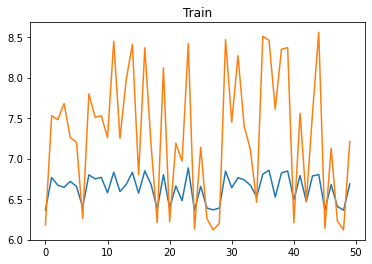

2/2 [==============================] - 4s 15ms/step


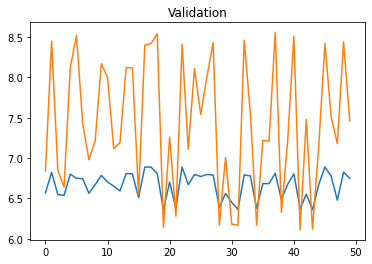

3/3 [==============================] - 0s 5ms/step


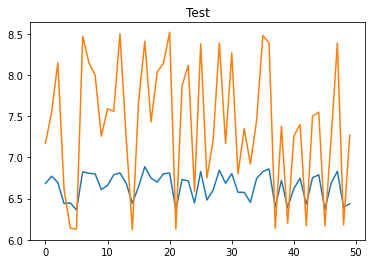

3/3 [==============================] - 0s 6ms/step


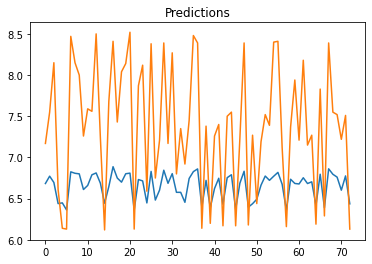

In [28]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [29]:
auto_lstm_mse

0.8934098887202677

### RNN

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 55.3085 - root_mean_squared_error: 7.4370 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 21s 2s/step - loss: 53.9654 - root_mean_squared_error: 7.3461 - val_loss: 48.7963 - val_root_mean_squared_error: 6.9854
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 48.2872 - root_mean_squared_error: 6.9489INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 48.1587 - root_mean_squared_error: 6.9396 - val_loss: 44.4099 - val_root_mean_squared_error: 6.6641
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 45.2416 - root_mean_squared_error: 6.7262INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 45.4928 - root_mean_squared_error: 6.7448 - val_loss: 40.3394 - val_root_mean_squared_error: 6.3513
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 40.2610 - root_mean_squared_error: 6.3452INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 40.3817 - root_mean_squared_error: 6.3547 - val_loss: 36.5746 - val_root_mean_squared_error: 6.0477
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 35.9710 - root_mean_squared_error: 5.9976INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 36.3632 - root_mean_squared_error: 6.0302 - val_loss: 33.0453 - val_root_mean_squared_error: 5.7485
Epoch 6/50
4/8 [==============>...............] - ETA: 0s - loss: 34.8236 - root_mean_squared_error: 5.9012INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 32.8945 - root_mean_squared_error: 5.7354 - val_loss: 29.8019 - val_root_mean_squared_error: 5.4591
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 29.0327 - root_mean_squared_error: 5.3882INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 29.1539 - root_mean_squared_error: 5.3994 - val_loss: 26.8342 - val_root_mean_squared_error: 5.1802
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 26.7526 - root_mean_squared_error: 5.1723INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 26.6836 - root_mean_squared_error: 5.1656 - val_loss: 24.0019 - val_root_mean_squared_error: 4.8992
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 24.9935 - root_mean_squared_error: 4.9993INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 24.3573 - root_mean_squared_error: 4.9353 - val_loss: 21.4337 - val_root_mean_squared_error: 4.6297
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 21.6600 - root_mean_squared_error: 4.6540INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 21.3997 - root_mean_squared_error: 4.6260 - val_loss: 19.1406 - val_root_mean_squared_error: 4.3750
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 20.4742 - root_mean_squared_error: 4.5248INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 25s 3s/step - loss: 19.7732 - root_mean_squared_error: 4.4467 - val_loss: 17.0385 - val_root_mean_squared_error: 4.1278
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 17.3135 - root_mean_squared_error: 4.1610INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 17.3135 - root_mean_squared_error: 4.1610 - val_loss: 15.1422 - val_root_mean_squared_error: 3.8913
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 15.2987 - root_mean_squared_error: 3.9114INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 15.3072 - root_mean_squared_error: 3.9124 - val_loss: 13.4570 - val_root_mean_squared_error: 3.6684
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 14.6359 - root_mean_squared_error: 3.8257INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 969ms/step - loss: 14.8198 - root_mean_squared_error: 3.8496 - val_loss: 11.9196 - val_root_mean_squared_error: 3.4525
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 12.6567 - root_mean_squared_error: 3.5576INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 12.9534 - root_mean_squared_error: 3.5991 - val_loss: 10.5166 - val_root_mean_squared_error: 3.2429
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 10.7038 - root_mean_squared_error: 3.2717INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 10.7038 - root_mean_squared_error: 3.2717 - val_loss: 9.2569 - val_root_mean_squared_error: 3.0425
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 10.2750 - root_mean_squared_error: 3.2055INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 30s 4s/step - loss: 10.2750 - root_mean_squared_error: 3.2055 - val_loss: 8.1460 - val_root_mean_squared_error: 2.8541
Epoch 18/50
4/8 [==============>...............] - ETA: 0s - loss: 7.9906 - root_mean_squared_error: 2.8268 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 8.5701 - root_mean_squared_error: 2.9275 - val_loss: 7.1523 - val_root_mean_squared_error: 2.6744
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 7.7129 - root_mean_squared_error: 2.7772INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 7.9815 - root_mean_squared_error: 2.8252 - val_loss: 6.2690 - val_root_mean_squared_error: 2.5038
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 7.7191 - root_mean_squared_error: 2.7783INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 7.2893 - root_mean_squared_error: 2.6999 - val_loss: 5.4738 - val_root_mean_squared_error: 2.3396
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 6.1736 - root_mean_squared_error: 2.4847INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 6.1736 - root_mean_squared_error: 2.4847 - val_loss: 4.7806 - val_root_mean_squared_error: 2.1865
Epoch 22/50
4/8 [==============>...............] - ETA: 0s - loss: 5.7253 - root_mean_squared_error: 2.3928INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 5.6964 - root_mean_squared_error: 2.3867 - val_loss: 4.1701 - val_root_mean_squared_error: 2.0421
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 4.9123 - root_mean_squared_error: 2.2164INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 4.9123 - root_mean_squared_error: 2.2164 - val_loss: 3.6287 - val_root_mean_squared_error: 1.9049
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 4.7094 - root_mean_squared_error: 2.1701INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 4.7094 - root_mean_squared_error: 2.1701 - val_loss: 3.1472 - val_root_mean_squared_error: 1.7740
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 4.1956 - root_mean_squared_error: 2.0483INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 4.1391 - root_mean_squared_error: 2.0345 - val_loss: 2.7365 - val_root_mean_squared_error: 1.6542
Epoch 26/50
5/8 [=================>............] - ETA: 0s - loss: 3.5188 - root_mean_squared_error: 1.8758INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 3.6598 - root_mean_squared_error: 1.9131 - val_loss: 2.3787 - val_root_mean_squared_error: 1.5423
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 3.1820 - root_mean_squared_error: 1.7838INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 3.1820 - root_mean_squared_error: 1.7838 - val_loss: 2.0787 - val_root_mean_squared_error: 1.4418
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2.9824 - root_mean_squared_error: 1.7270INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2.8730 - root_mean_squared_error: 1.6950 - val_loss: 1.8367 - val_root_mean_squared_error: 1.3552
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2.9191 - root_mean_squared_error: 1.7085INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 2.9550 - root_mean_squared_error: 1.7190 - val_loss: 1.6353 - val_root_mean_squared_error: 1.2788
Epoch 30/50
4/8 [==============>...............] - ETA: 0s - loss: 3.2664 - root_mean_squared_error: 1.8073INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2.8963 - root_mean_squared_error: 1.7018 - val_loss: 1.4620 - val_root_mean_squared_error: 1.2091
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 2.2490 - root_mean_squared_error: 1.4997INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2.3113 - root_mean_squared_error: 1.5203 - val_loss: 1.3262 - val_root_mean_squared_error: 1.1516
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 1.8141 - root_mean_squared_error: 1.3469INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.8141 - root_mean_squared_error: 1.3469 - val_loss: 1.2160 - val_root_mean_squared_error: 1.1027
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 1.9733 - root_mean_squared_error: 1.4048INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.9557 - root_mean_squared_error: 1.3985 - val_loss: 1.1284 - val_root_mean_squared_error: 1.0623
Epoch 34/50
5/8 [=================>............] - ETA: 0s - loss: 1.8071 - root_mean_squared_error: 1.3443INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.7509 - root_mean_squared_error: 1.3232 - val_loss: 1.0625 - val_root_mean_squared_error: 1.0308
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 1.6142 - root_mean_squared_error: 1.2705INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.6507 - root_mean_squared_error: 1.2848 - val_loss: 1.0078 - val_root_mean_squared_error: 1.0039
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 1.5046 - root_mean_squared_error: 1.2266INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 1.5046 - root_mean_squared_error: 1.2266 - val_loss: 0.9601 - val_root_mean_squared_error: 0.9798
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 1.7376 - root_mean_squared_error: 1.3182INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 24s 3s/step - loss: 1.7376 - root_mean_squared_error: 1.3182 - val_loss: 0.9120 - val_root_mean_squared_error: 0.9550
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 1.6043 - root_mean_squared_error: 1.2666INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1.6298 - root_mean_squared_error: 1.2766 - val_loss: 0.8711 - val_root_mean_squared_error: 0.9333
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 1.7347 - root_mean_squared_error: 1.3171INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.8000 - root_mean_squared_error: 1.3416 - val_loss: 0.8398 - val_root_mean_squared_error: 0.9164
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 1.6132 - root_mean_squared_error: 1.2701INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.5401 - root_mean_squared_error: 1.2410 - val_loss: 0.8179 - val_root_mean_squared_error: 0.9044
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 1.4972 - root_mean_squared_error: 1.2236INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1.4827 - root_mean_squared_error: 1.2176 - val_loss: 0.7987 - val_root_mean_squared_error: 0.8937
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 1.7508 - root_mean_squared_error: 1.3232INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 1.7317 - root_mean_squared_error: 1.3159 - val_loss: 0.7822 - val_root_mean_squared_error: 0.8844
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 1.7127 - root_mean_squared_error: 1.3087INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.7127 - root_mean_squared_error: 1.3087 - val_loss: 0.7662 - val_root_mean_squared_error: 0.8753
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 1.4406 - root_mean_squared_error: 1.2003INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 1.4277 - root_mean_squared_error: 1.1949 - val_loss: 0.7504 - val_root_mean_squared_error: 0.8662
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 1.7371 - root_mean_squared_error: 1.3180INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1.5618 - root_mean_squared_error: 1.2497 - val_loss: 0.7391 - val_root_mean_squared_error: 0.8597
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 1.5808 - root_mean_squared_error: 1.2573INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 1.5552 - root_mean_squared_error: 1.2471 - val_loss: 0.7309 - val_root_mean_squared_error: 0.8549
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3879 - root_mean_squared_error: 1.1781INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.3467 - root_mean_squared_error: 1.1605 - val_loss: 0.7255 - val_root_mean_squared_error: 0.8518
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 1.7366 - root_mean_squared_error: 1.3178INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 1.7030 - root_mean_squared_error: 1.3050 - val_loss: 0.7208 - val_root_mean_squared_error: 0.8490
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 1.4019 - root_mean_squared_error: 1.1840INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1.3725 - root_mean_squared_error: 1.1715 - val_loss: 0.7157 - val_root_mean_squared_error: 0.8460
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 1.5351 - root_mean_squared_error: 1.2390INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 2s 8ms/step


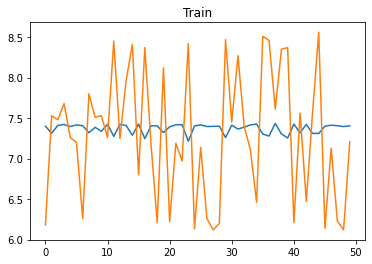

2/2 [==============================] - 2s 7ms/step


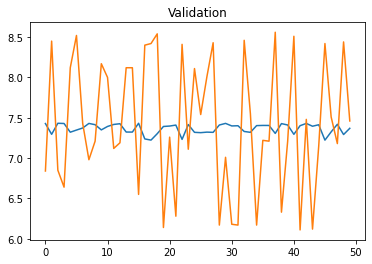

3/3 [==============================] - 0s 75ms/step


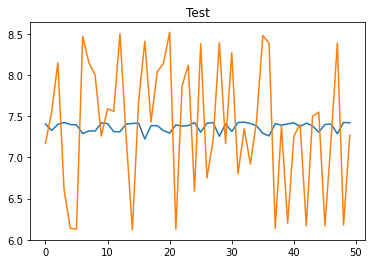

3/3 [==============================] - 0s 4ms/step


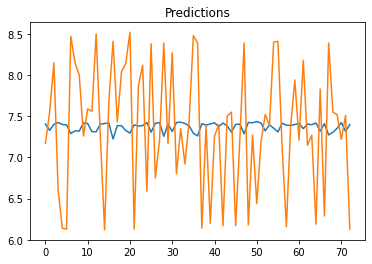

In [30]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [31]:
auto_rnn_mse

0.6278061604811762

# Moving Average with Encoder

### CNN

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 25865.9023 - root_mean_squared_error: 160.8288

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 14s 1s/step - loss: 25415.9629 - root_mean_squared_error: 159.4238 - val_loss: 285.4818 - val_root_mean_squared_error: 16.8962
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 17728.8438 - root_mean_squared_error: 133.1497

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 805ms/step - loss: 17503.7891 - root_mean_squared_error: 132.3019 - val_loss: 187.4863 - val_root_mean_squared_error: 13.6926
Epoch 3/50
8/8 [==============================] - 0s 39ms/step - loss: 17049.0820 - root_mean_squared_error: 130.5721 - val_loss: 700.0787 - val_root_mean_squared_error: 26.4590
Epoch 4/50
8/8 [==============================] - 0s 37ms/step - loss: 15087.4180 - root_mean_squared_error: 122.8308 - val_loss: 477.0188 - val_root_mean_squared_error: 21.8408
Epoch 5/50
8/8 [==============================] - 0s 29ms/step - loss: 13168.7695 - root_mean_squared_error: 114.7553 - val_loss: 324.8459 - val_root_mean_squared_error: 18.0235
Epoch 6/50
8/8 [==============================] - 0s 37ms/step - loss: 15480.0029 - root_mean_squared_error: 124.4187 - val_loss: 634.9379 - val_root_mean_squared_error: 25.1980
Epoch 7/50
8/8 [==============================] - 0s 27ms/step - loss: 14092.8438 - root_mean_squared_error: 118.7133 - 

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 878ms/step - loss: 3809.3870 - root_mean_squared_error: 61.7202 - val_loss: 4.2517 - val_root_mean_squared_error: 2.0620
Epoch 14/50
8/8 [==============================] - 0s 62ms/step - loss: 3422.6772 - root_mean_squared_error: 58.5037 - val_loss: 132.2073 - val_root_mean_squared_error: 11.4981
Epoch 15/50
8/8 [==============================] - 0s 49ms/step - loss: 2819.7764 - root_mean_squared_error: 53.1016 - val_loss: 158.7748 - val_root_mean_squared_error: 12.6006
Epoch 16/50
8/8 [==============================] - 0s 39ms/step - loss: 1961.3344 - root_mean_squared_error: 44.2870 - val_loss: 151.3710 - val_root_mean_squared_error: 12.3033
Epoch 17/50
8/8 [==============================] - 1s 87ms/step - loss: 1588.8965 - root_mean_squared_error: 39.8610 - val_loss: 136.8870 - val_root_mean_squared_error: 11.6999
Epoch 18/50
8/8 [==============================] - 0s 29ms/step - loss: 1797.0426 - root_mean_squared_error: 42.3915 - val_loss: 

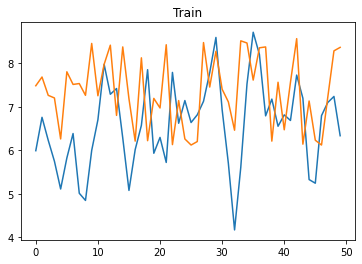

2/2 [==============================] - 0s 5ms/step


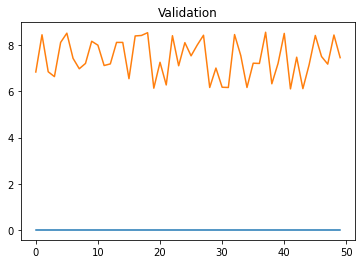

3/3 [==============================] - 0s 4ms/step


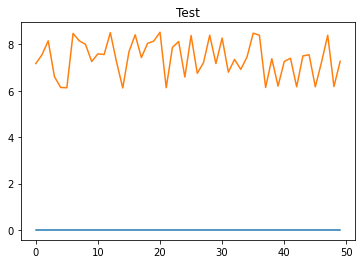

3/3 [==============================] - 0s 4ms/step


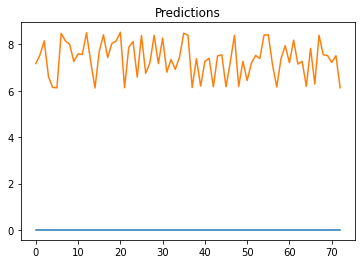

In [32]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [33]:
mavg_auto_cnn_mse

54.85937853282308

### RNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 57.4671 - root_mean_squared_error: 7.5807 INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 20s 2s/step - loss: 56.2852 - root_mean_squared_error: 7.5023 - val_loss: 51.0013 - val_root_mean_squared_error: 7.1415
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 51.3657 - root_mean_squared_error: 7.1670INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 26s 4s/step - loss: 50.0465 - root_mean_squared_error: 7.0744 - val_loss: 45.0757 - val_root_mean_squared_error: 6.7138
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 44.7401 - root_mean_squared_error: 6.6888INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 43.4042 - root_mean_squared_error: 6.5882 - val_loss: 39.8481 - val_root_mean_squared_error: 6.3125
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 38.9076 - root_mean_squared_error: 6.2376INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 38.9055 - root_mean_squared_error: 6.2374 - val_loss: 35.1192 - val_root_mean_squared_error: 5.9261
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 34.1230 - root_mean_squared_error: 5.8415INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 33.9999 - root_mean_squared_error: 5.8309 - val_loss: 30.8636 - val_root_mean_squared_error: 5.5555
Epoch 6/50
4/8 [==============>...............] - ETA: 0s - loss: 31.5238 - root_mean_squared_error: 5.6146INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 30.4614 - root_mean_squared_error: 5.5192 - val_loss: 27.0707 - val_root_mean_squared_error: 5.2029
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 27.3399 - root_mean_squared_error: 5.2288INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 26.8675 - root_mean_squared_error: 5.1834 - val_loss: 23.8396 - val_root_mean_squared_error: 4.8826
Epoch 8/50
4/8 [==============>...............] - ETA: 0s - loss: 26.6159 - root_mean_squared_error: 5.1591INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 21s 3s/step - loss: 24.8029 - root_mean_squared_error: 4.9802 - val_loss: 20.9447 - val_root_mean_squared_error: 4.5765
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 20.9075 - root_mean_squared_error: 4.5725INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 21.2549 - root_mean_squared_error: 4.6103 - val_loss: 18.3788 - val_root_mean_squared_error: 4.2871
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 18.6235 - root_mean_squared_error: 4.3155INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 18.6235 - root_mean_squared_error: 4.3155 - val_loss: 16.0964 - val_root_mean_squared_error: 4.0120
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 16.1214 - root_mean_squared_error: 4.0151INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 15.2942 - root_mean_squared_error: 3.9108 - val_loss: 14.0953 - val_root_mean_squared_error: 3.7544
Epoch 12/50
5/8 [=================>............] - ETA: 0s - loss: 14.4232 - root_mean_squared_error: 3.7978INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 13.6866 - root_mean_squared_error: 3.6995 - val_loss: 12.3585 - val_root_mean_squared_error: 3.5155
Epoch 13/50
3/8 [==========>...................] - ETA: 0s - loss: 12.3815 - root_mean_squared_error: 3.5187INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 12.6127 - root_mean_squared_error: 3.5514 - val_loss: 10.8192 - val_root_mean_squared_error: 3.2893
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 11.2873 - root_mean_squared_error: 3.3597INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 11.2452 - root_mean_squared_error: 3.3534 - val_loss: 9.4425 - val_root_mean_squared_error: 3.0729
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 9.7532 - root_mean_squared_error: 3.1230INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 9.5317 - root_mean_squared_error: 3.0874 - val_loss: 8.2274 - val_root_mean_squared_error: 2.8683
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 8.3302 - root_mean_squared_error: 2.8862INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 777ms/step - loss: 8.5124 - root_mean_squared_error: 2.9176 - val_loss: 7.1543 - val_root_mean_squared_error: 2.6748
Epoch 17/50
4/8 [==============>...............] - ETA: 0s - loss: 8.1374 - root_mean_squared_error: 2.8526INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 7.3575 - root_mean_squared_error: 2.7125 - val_loss: 6.2074 - val_root_mean_squared_error: 2.4915
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 6.8144 - root_mean_squared_error: 2.6104INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 6.8144 - root_mean_squared_error: 2.6104 - val_loss: 5.3978 - val_root_mean_squared_error: 2.3233
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 8.4105 - root_mean_squared_error: 2.9001INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 5.8777 - root_mean_squared_error: 2.4244 - val_loss: 4.6841 - val_root_mean_squared_error: 2.1643
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 5.3479 - root_mean_squared_error: 2.3125INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 5.1737 - root_mean_squared_error: 2.2746 - val_loss: 4.0695 - val_root_mean_squared_error: 2.0173
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 4.5272 - root_mean_squared_error: 2.1277INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 4.4201 - root_mean_squared_error: 2.1024 - val_loss: 3.5251 - val_root_mean_squared_error: 1.8775
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 4.2249 - root_mean_squared_error: 2.0555INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 4.1947 - root_mean_squared_error: 2.0481 - val_loss: 3.0440 - val_root_mean_squared_error: 1.7447
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 3.6626 - root_mean_squared_error: 1.9138INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 808ms/step - loss: 3.7677 - root_mean_squared_error: 1.9411 - val_loss: 2.6291 - val_root_mean_squared_error: 1.6214
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2.9466 - root_mean_squared_error: 1.7166INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2.9726 - root_mean_squared_error: 1.7241 - val_loss: 2.2794 - val_root_mean_squared_error: 1.5098
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2.8644 - root_mean_squared_error: 1.6925INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2.8551 - root_mean_squared_error: 1.6897 - val_loss: 1.9943 - val_root_mean_squared_error: 1.4122
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2.7947 - root_mean_squared_error: 1.6717INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2.7829 - root_mean_squared_error: 1.6682 - val_loss: 1.7540 - val_root_mean_squared_error: 1.3244
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2.4017 - root_mean_squared_error: 1.5497INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2.4003 - root_mean_squared_error: 1.5493 - val_loss: 1.5562 - val_root_mean_squared_error: 1.2475
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2.3987 - root_mean_squared_error: 1.5488INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 2.4116 - root_mean_squared_error: 1.5529 - val_loss: 1.3738 - val_root_mean_squared_error: 1.1721
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2.1939 - root_mean_squared_error: 1.4812INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2.1939 - root_mean_squared_error: 1.4812 - val_loss: 1.2284 - val_root_mean_squared_error: 1.1083
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2.0968 - root_mean_squared_error: 1.4480INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 959ms/step - loss: 2.0968 - root_mean_squared_error: 1.4480 - val_loss: 1.1177 - val_root_mean_squared_error: 1.0572
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2.1680 - root_mean_squared_error: 1.4724INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2.1680 - root_mean_squared_error: 1.4724 - val_loss: 1.0182 - val_root_mean_squared_error: 1.0090
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 1.9112 - root_mean_squared_error: 1.3825INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.9112 - root_mean_squared_error: 1.3825 - val_loss: 0.9338 - val_root_mean_squared_error: 0.9663
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 1.8125 - root_mean_squared_error: 1.3463INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 1.7939 - root_mean_squared_error: 1.3394 - val_loss: 0.8676 - val_root_mean_squared_error: 0.9314
Epoch 34/50
5/8 [=================>............] - ETA: 0s - loss: 1.8639 - root_mean_squared_error: 1.3653INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 1.7984 - root_mean_squared_error: 1.3410 - val_loss: 0.8188 - val_root_mean_squared_error: 0.9049
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 1.7410 - root_mean_squared_error: 1.3195INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 1.7410 - root_mean_squared_error: 1.3195 - val_loss: 0.7816 - val_root_mean_squared_error: 0.8841
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 1.7492 - root_mean_squared_error: 1.3226INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.7021 - root_mean_squared_error: 1.3047 - val_loss: 0.7522 - val_root_mean_squared_error: 0.8673
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 1.5155 - root_mean_squared_error: 1.2311INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.5269 - root_mean_squared_error: 1.2357 - val_loss: 0.7248 - val_root_mean_squared_error: 0.8514
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 1.2454 - root_mean_squared_error: 1.1160INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1.2253 - root_mean_squared_error: 1.1069 - val_loss: 0.7066 - val_root_mean_squared_error: 0.8406
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3733 - root_mean_squared_error: 1.1719INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.4148 - root_mean_squared_error: 1.1894 - val_loss: 0.6900 - val_root_mean_squared_error: 0.8307
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 1.5493 - root_mean_squared_error: 1.2447INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.5942 - root_mean_squared_error: 1.2626 - val_loss: 0.6743 - val_root_mean_squared_error: 0.8212
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 1.2989 - root_mean_squared_error: 1.1397INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 26s 4s/step - loss: 1.3080 - root_mean_squared_error: 1.1437 - val_loss: 0.6620 - val_root_mean_squared_error: 0.8137
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 1.3388 - root_mean_squared_error: 1.1571INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 1.3388 - root_mean_squared_error: 1.1571 - val_loss: 0.6535 - val_root_mean_squared_error: 0.8084
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 1.3450 - root_mean_squared_error: 1.1597INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.3648 - root_mean_squared_error: 1.1683 - val_loss: 0.6490 - val_root_mean_squared_error: 0.8056
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 1.5836 - root_mean_squared_error: 1.2584INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.5836 - root_mean_squared_error: 1.2584 - val_loss: 0.6454 - val_root_mean_squared_error: 0.8034
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 1.4158 - root_mean_squared_error: 1.1899INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 1.3717 - root_mean_squared_error: 1.1712 - val_loss: 0.6420 - val_root_mean_squared_error: 0.8013
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 1.4751 - root_mean_squared_error: 1.2145INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1.4751 - root_mean_squared_error: 1.2145 - val_loss: 0.6384 - val_root_mean_squared_error: 0.7990
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 1.4448 - root_mean_squared_error: 1.2020INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 21s 3s/step - loss: 1.4448 - root_mean_squared_error: 1.2020 - val_loss: 0.6343 - val_root_mean_squared_error: 0.7964
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 1.3430 - root_mean_squared_error: 1.1589INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 990ms/step - loss: 1.3430 - root_mean_squared_error: 1.1589 - val_loss: 0.6311 - val_root_mean_squared_error: 0.7944
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 1.5380 - root_mean_squared_error: 1.2402INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1.3785 - root_mean_squared_error: 1.1741 - val_loss: 0.6285 - val_root_mean_squared_error: 0.7928
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 1.7103 - root_mean_squared_error: 1.3078INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 6ms/step


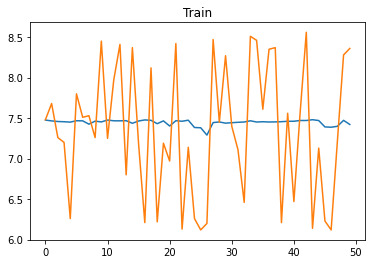

2/2 [==============================] - 1s 5ms/step


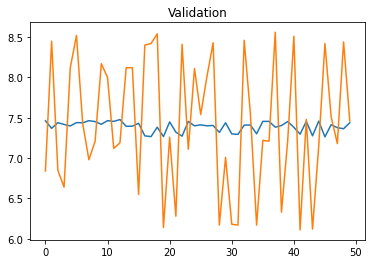

3/3 [==============================] - 0s 96ms/step


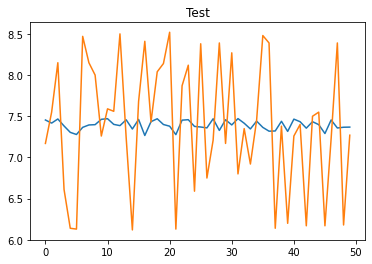

3/3 [==============================] - 1s 16ms/step


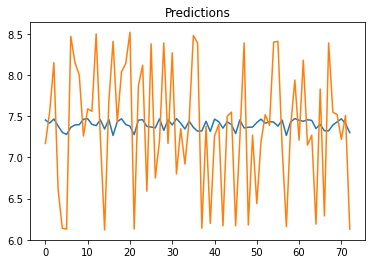

In [34]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [35]:
mavg_auto_rnn_mse

0.5462073779212986

### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 46.4717 - root_mean_squared_error: 6.8170

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 62s 6s/step - loss: 46.4717 - root_mean_squared_error: 6.8170 - val_loss: 43.5183 - val_root_mean_squared_error: 6.5968
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 42.2735 - root_mean_squared_error: 6.5018

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 42.6093 - root_mean_squared_error: 6.5276 - val_loss: 40.5309 - val_root_mean_squared_error: 6.3664
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 40.1922 - root_mean_squared_error: 6.3397

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 40.1442 - root_mean_squared_error: 6.3359 - val_loss: 37.6575 - val_root_mean_squared_error: 6.1366
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 37.2861 - root_mean_squared_error: 6.1062

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 37.2776 - root_mean_squared_error: 6.1055 - val_loss: 34.9099 - val_root_mean_squared_error: 5.9085
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 34.5352 - root_mean_squared_error: 5.8767

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 34.5352 - root_mean_squared_error: 5.8767 - val_loss: 32.2444 - val_root_mean_squared_error: 5.6784
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 32.2209 - root_mean_squared_error: 5.6763

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 32.2209 - root_mean_squared_error: 5.6763 - val_loss: 29.6259 - val_root_mean_squared_error: 5.4430
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 29.4636 - root_mean_squared_error: 5.4280

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 29.1911 - root_mean_squared_error: 5.4029 - val_loss: 27.0842 - val_root_mean_squared_error: 5.2042
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 26.3229 - root_mean_squared_error: 5.1306

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 26.4355 - root_mean_squared_error: 5.1415 - val_loss: 24.7367 - val_root_mean_squared_error: 4.9736
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 24.4325 - root_mean_squared_error: 4.9429

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 24.4325 - root_mean_squared_error: 4.9429 - val_loss: 22.4988 - val_root_mean_squared_error: 4.7433
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 22.0287 - root_mean_squared_error: 4.6935

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 22.0148 - root_mean_squared_error: 4.6920 - val_loss: 20.3830 - val_root_mean_squared_error: 4.5147
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 20.3195 - root_mean_squared_error: 4.5077

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 20.2037 - root_mean_squared_error: 4.4948 - val_loss: 18.3828 - val_root_mean_squared_error: 4.2875
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 18.6227 - root_mean_squared_error: 4.3154

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 18.1160 - root_mean_squared_error: 4.2563 - val_loss: 16.4665 - val_root_mean_squared_error: 4.0579
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 16.3690 - root_mean_squared_error: 4.0459

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 16.3690 - root_mean_squared_error: 4.0459 - val_loss: 14.6923 - val_root_mean_squared_error: 3.8331
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 14.0184 - root_mean_squared_error: 3.7441

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 39s 5s/step - loss: 14.1429 - root_mean_squared_error: 3.7607 - val_loss: 13.0430 - val_root_mean_squared_error: 3.6115
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 12.7869 - root_mean_squared_error: 3.5759

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 12.8866 - root_mean_squared_error: 3.5898 - val_loss: 11.4993 - val_root_mean_squared_error: 3.3911
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 11.2353 - root_mean_squared_error: 3.3519

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 11.2353 - root_mean_squared_error: 3.3519 - val_loss: 10.0721 - val_root_mean_squared_error: 3.1737
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 10.0284 - root_mean_squared_error: 3.1668

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 10.0284 - root_mean_squared_error: 3.1668 - val_loss: 8.7810 - val_root_mean_squared_error: 2.9633
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 8.8715 - root_mean_squared_error: 2.9785

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 8.8715 - root_mean_squared_error: 2.9785 - val_loss: 7.6044 - val_root_mean_squared_error: 2.7576
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 7.7625 - root_mean_squared_error: 2.7861

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 7.7625 - root_mean_squared_error: 2.7861 - val_loss: 6.5646 - val_root_mean_squared_error: 2.5621
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 6.4450 - root_mean_squared_error: 2.5387

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 39s 5s/step - loss: 6.4450 - root_mean_squared_error: 2.5387 - val_loss: 5.6424 - val_root_mean_squared_error: 2.3754
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 5.6374 - root_mean_squared_error: 2.3743

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 5.5974 - root_mean_squared_error: 2.3659 - val_loss: 4.8675 - val_root_mean_squared_error: 2.2062
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 5.3526 - root_mean_squared_error: 2.3136

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 5.2902 - root_mean_squared_error: 2.3000 - val_loss: 4.1808 - val_root_mean_squared_error: 2.0447
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 4.4731 - root_mean_squared_error: 2.1150

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 4.2650 - root_mean_squared_error: 2.0652 - val_loss: 3.5907 - val_root_mean_squared_error: 1.8949
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 3.6302 - root_mean_squared_error: 1.9053

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 3.6302 - root_mean_squared_error: 1.9053 - val_loss: 3.0989 - val_root_mean_squared_error: 1.7604
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 3.2708 - root_mean_squared_error: 1.8085

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 3.2570 - root_mean_squared_error: 1.8047 - val_loss: 2.6742 - val_root_mean_squared_error: 1.6353
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2.8127 - root_mean_squared_error: 1.6771

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2.8127 - root_mean_squared_error: 1.6771 - val_loss: 2.3136 - val_root_mean_squared_error: 1.5210
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2.5761 - root_mean_squared_error: 1.6050

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2.5327 - root_mean_squared_error: 1.5915 - val_loss: 2.0070 - val_root_mean_squared_error: 1.4167
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2.3304 - root_mean_squared_error: 1.5266

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2.2873 - root_mean_squared_error: 1.5124 - val_loss: 1.7535 - val_root_mean_squared_error: 1.3242
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 1.9313 - root_mean_squared_error: 1.3897

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 1.9313 - root_mean_squared_error: 1.3897 - val_loss: 1.5414 - val_root_mean_squared_error: 1.2415
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2.0281 - root_mean_squared_error: 1.4241

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2.0125 - root_mean_squared_error: 1.4186 - val_loss: 1.3667 - val_root_mean_squared_error: 1.1691
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 1.5595 - root_mean_squared_error: 1.2488

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 1.5020 - root_mean_squared_error: 1.2256 - val_loss: 1.2230 - val_root_mean_squared_error: 1.1059
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 1.4230 - root_mean_squared_error: 1.1929

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 1.4200 - root_mean_squared_error: 1.1916 - val_loss: 1.1091 - val_root_mean_squared_error: 1.0531
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 1.3892 - root_mean_squared_error: 1.1787

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 1.3892 - root_mean_squared_error: 1.1787 - val_loss: 1.0116 - val_root_mean_squared_error: 1.0058
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 1.3158 - root_mean_squared_error: 1.1471

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 1.3058 - root_mean_squared_error: 1.1427 - val_loss: 0.9309 - val_root_mean_squared_error: 0.9648
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 1.2548 - root_mean_squared_error: 1.1202

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 1.2681 - root_mean_squared_error: 1.1261 - val_loss: 0.8672 - val_root_mean_squared_error: 0.9312
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 1.2145 - root_mean_squared_error: 1.1021

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 1.2145 - root_mean_squared_error: 1.1021 - val_loss: 0.8130 - val_root_mean_squared_error: 0.9016
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 1.1115 - root_mean_squared_error: 1.0543

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 1.1115 - root_mean_squared_error: 1.0543 - val_loss: 0.7700 - val_root_mean_squared_error: 0.8775
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 1.0153 - root_mean_squared_error: 1.0076

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 1.0153 - root_mean_squared_error: 1.0076 - val_loss: 0.7357 - val_root_mean_squared_error: 0.8577
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9680 - root_mean_squared_error: 0.9839

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 0.9577 - root_mean_squared_error: 0.9786 - val_loss: 0.7096 - val_root_mean_squared_error: 0.8424
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 0.9646 - root_mean_squared_error: 0.9821

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 0.9646 - root_mean_squared_error: 0.9821 - val_loss: 0.6920 - val_root_mean_squared_error: 0.8319
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 0.9893 - root_mean_squared_error: 0.9947

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 0.9893 - root_mean_squared_error: 0.9947 - val_loss: 0.6806 - val_root_mean_squared_error: 0.8250
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 0.9845 - root_mean_squared_error: 0.9922

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 0.9845 - root_mean_squared_error: 0.9922 - val_loss: 0.6718 - val_root_mean_squared_error: 0.8196
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9021 - root_mean_squared_error: 0.9498

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 0.9029 - root_mean_squared_error: 0.9502 - val_loss: 0.6650 - val_root_mean_squared_error: 0.8155
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 0.8859 - root_mean_squared_error: 0.9412

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 0.8592 - root_mean_squared_error: 0.9269 - val_loss: 0.6604 - val_root_mean_squared_error: 0.8127
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 1.0159 - root_mean_squared_error: 1.0079

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 1.0159 - root_mean_squared_error: 1.0079 - val_loss: 0.6553 - val_root_mean_squared_error: 0.8095
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 0.7611 - root_mean_squared_error: 0.8724

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 0.7611 - root_mean_squared_error: 0.8724 - val_loss: 0.6516 - val_root_mean_squared_error: 0.8072
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9552 - root_mean_squared_error: 0.9774

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 0.9483 - root_mean_squared_error: 0.9738 - val_loss: 0.6486 - val_root_mean_squared_error: 0.8054
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8609 - root_mean_squared_error: 0.9278

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 0.8556 - root_mean_squared_error: 0.9250 - val_loss: 0.6462 - val_root_mean_squared_error: 0.8039
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 0.9173 - root_mean_squared_error: 0.9578

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 0.9173 - root_mean_squared_error: 0.9578 - val_loss: 0.6449 - val_root_mean_squared_error: 0.8031
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 0.9440 - root_mean_squared_error: 0.9716

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 8s 14ms/step


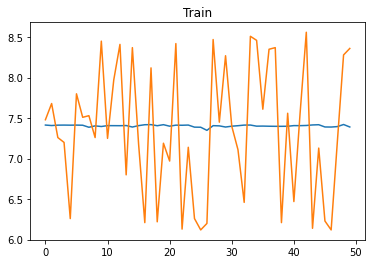

2/2 [==============================] - 4s 10ms/step


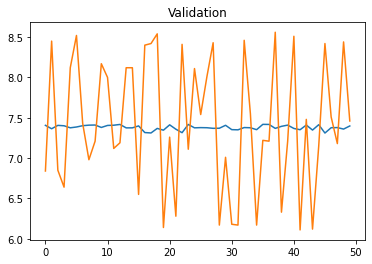

3/3 [==============================] - 0s 6ms/step


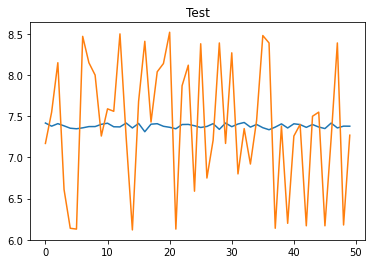

3/3 [==============================] - 1s 480ms/step


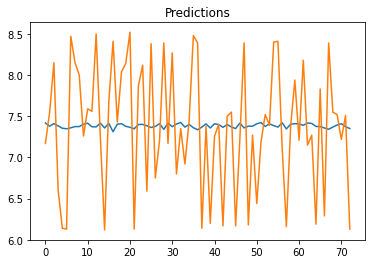

In [36]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [37]:
mavg_auto_gru_mse

0.5691850255136744

### LSTM

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 48.8533 - root_mean_squared_error: 6.9895

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 54s 6s/step - loss: 48.8717 - root_mean_squared_error: 6.9908 - val_loss: 46.9770 - val_root_mean_squared_error: 6.8540
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 46.6949 - root_mean_squared_error: 6.8334

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 46.7770 - root_mean_squared_error: 6.8394 - val_loss: 45.4026 - val_root_mean_squared_error: 6.7381
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 46.0808 - root_mean_squared_error: 6.7883

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 45.9437 - root_mean_squared_error: 6.7782 - val_loss: 43.8437 - val_root_mean_squared_error: 6.6215
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 44.1389 - root_mean_squared_error: 6.6437

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 44.1389 - root_mean_squared_error: 6.6437 - val_loss: 42.3048 - val_root_mean_squared_error: 6.5042
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 42.3336 - root_mean_squared_error: 6.5064

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 42.3336 - root_mean_squared_error: 6.5064 - val_loss: 40.7777 - val_root_mean_squared_error: 6.3857
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 40.8283 - root_mean_squared_error: 6.3897

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 40.8283 - root_mean_squared_error: 6.3897 - val_loss: 39.2178 - val_root_mean_squared_error: 6.2624
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 39.1443 - root_mean_squared_error: 6.2565

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 39.1443 - root_mean_squared_error: 6.2565 - val_loss: 37.6331 - val_root_mean_squared_error: 6.1346
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 38.1082 - root_mean_squared_error: 6.1732

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 37.7652 - root_mean_squared_error: 6.1453 - val_loss: 36.0080 - val_root_mean_squared_error: 6.0007
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 36.4687 - root_mean_squared_error: 6.0389

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 36.4687 - root_mean_squared_error: 6.0389 - val_loss: 34.4667 - val_root_mean_squared_error: 5.8708
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 34.8566 - root_mean_squared_error: 5.9039

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 34.8364 - root_mean_squared_error: 5.9022 - val_loss: 32.9729 - val_root_mean_squared_error: 5.7422
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 33.0052 - root_mean_squared_error: 5.7450

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 33.0028 - root_mean_squared_error: 5.7448 - val_loss: 31.4912 - val_root_mean_squared_error: 5.6117
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 31.1933 - root_mean_squared_error: 5.5851

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 31.3433 - root_mean_squared_error: 5.5985 - val_loss: 30.0060 - val_root_mean_squared_error: 5.4778
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 30.2552 - root_mean_squared_error: 5.5005

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 30.2739 - root_mean_squared_error: 5.5022 - val_loss: 28.4802 - val_root_mean_squared_error: 5.3367
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 28.8644 - root_mean_squared_error: 5.3726

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 28.8643 - root_mean_squared_error: 5.3726 - val_loss: 26.9387 - val_root_mean_squared_error: 5.1903
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 27.0830 - root_mean_squared_error: 5.2041

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 27.0444 - root_mean_squared_error: 5.2004 - val_loss: 25.3868 - val_root_mean_squared_error: 5.0385
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 25.7848 - root_mean_squared_error: 5.0779

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 25.6018 - root_mean_squared_error: 5.0598 - val_loss: 23.8970 - val_root_mean_squared_error: 4.8885
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 23.5698 - root_mean_squared_error: 4.8549

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 23.6495 - root_mean_squared_error: 4.8631 - val_loss: 22.4020 - val_root_mean_squared_error: 4.7331
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 22.3049 - root_mean_squared_error: 4.7228

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 59s 8s/step - loss: 22.0733 - root_mean_squared_error: 4.6982 - val_loss: 20.9288 - val_root_mean_squared_error: 4.5748
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 20.9647 - root_mean_squared_error: 4.5787

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 21.1092 - root_mean_squared_error: 4.5945 - val_loss: 19.4293 - val_root_mean_squared_error: 4.4079
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 19.1001 - root_mean_squared_error: 4.3704

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 19.1001 - root_mean_squared_error: 4.3704 - val_loss: 17.7781 - val_root_mean_squared_error: 4.2164
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 17.3761 - root_mean_squared_error: 4.1685

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 17.4943 - root_mean_squared_error: 4.1826 - val_loss: 16.4211 - val_root_mean_squared_error: 4.0523
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 16.3572 - root_mean_squared_error: 4.0444

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 16.3012 - root_mean_squared_error: 4.0375 - val_loss: 15.1885 - val_root_mean_squared_error: 3.8972
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 15.5533 - root_mean_squared_error: 3.9438

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 55s 8s/step - loss: 15.5533 - root_mean_squared_error: 3.9438 - val_loss: 13.9904 - val_root_mean_squared_error: 3.7404
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 13.8884 - root_mean_squared_error: 3.7267

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 13.8884 - root_mean_squared_error: 3.7267 - val_loss: 12.7746 - val_root_mean_squared_error: 3.5742
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 12.8264 - root_mean_squared_error: 3.5814

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 12.8264 - root_mean_squared_error: 3.5814 - val_loss: 11.3491 - val_root_mean_squared_error: 3.3688
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 11.6248 - root_mean_squared_error: 3.4095

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 65s 9s/step - loss: 11.6248 - root_mean_squared_error: 3.4095 - val_loss: 10.2316 - val_root_mean_squared_error: 3.1987
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 10.1768 - root_mean_squared_error: 3.1901

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 10.1768 - root_mean_squared_error: 3.1901 - val_loss: 9.1959 - val_root_mean_squared_error: 3.0325
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 9.1811 - root_mean_squared_error: 3.0300

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 9.1811 - root_mean_squared_error: 3.0300 - val_loss: 8.2561 - val_root_mean_squared_error: 2.8733
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 8.2742 - root_mean_squared_error: 2.8765

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 8.3347 - root_mean_squared_error: 2.8870 - val_loss: 7.2586 - val_root_mean_squared_error: 2.6942
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 7.2135 - root_mean_squared_error: 2.6858

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 7.2135 - root_mean_squared_error: 2.6858 - val_loss: 6.4125 - val_root_mean_squared_error: 2.5323
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 6.3768 - root_mean_squared_error: 2.5252

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 6.3768 - root_mean_squared_error: 2.5252 - val_loss: 5.6844 - val_root_mean_squared_error: 2.3842
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 5.9632 - root_mean_squared_error: 2.4420

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 58s 8s/step - loss: 5.9632 - root_mean_squared_error: 2.4420 - val_loss: 5.0240 - val_root_mean_squared_error: 2.2414
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 5.4259 - root_mean_squared_error: 2.3294

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 5.4228 - root_mean_squared_error: 2.3287 - val_loss: 4.4172 - val_root_mean_squared_error: 2.1017
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 4.6575 - root_mean_squared_error: 2.1581

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 4.6575 - root_mean_squared_error: 2.1581 - val_loss: 3.8793 - val_root_mean_squared_error: 1.9696
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 4.5545 - root_mean_squared_error: 2.1341

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 63s 9s/step - loss: 4.5336 - root_mean_squared_error: 2.1292 - val_loss: 3.3809 - val_root_mean_squared_error: 1.8387
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 3.9520 - root_mean_squared_error: 1.9880

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 3.9520 - root_mean_squared_error: 1.9880 - val_loss: 2.9189 - val_root_mean_squared_error: 1.7085
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 3.2274 - root_mean_squared_error: 1.7965

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 3.2274 - root_mean_squared_error: 1.7965 - val_loss: 2.5374 - val_root_mean_squared_error: 1.5929
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 3.1231 - root_mean_squared_error: 1.7672

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 3.0870 - root_mean_squared_error: 1.7570 - val_loss: 2.1825 - val_root_mean_squared_error: 1.4773
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2.5434 - root_mean_squared_error: 1.5948

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2.5478 - root_mean_squared_error: 1.5962 - val_loss: 1.9077 - val_root_mean_squared_error: 1.3812
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 2.2994 - root_mean_squared_error: 1.5164

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2.2739 - root_mean_squared_error: 1.5080 - val_loss: 1.6779 - val_root_mean_squared_error: 1.2953
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2.2001 - root_mean_squared_error: 1.4833

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 57s 8s/step - loss: 2.2073 - root_mean_squared_error: 1.4857 - val_loss: 1.4812 - val_root_mean_squared_error: 1.2170
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 1.8289 - root_mean_squared_error: 1.3524

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 1.8390 - root_mean_squared_error: 1.3561 - val_loss: 1.3089 - val_root_mean_squared_error: 1.1441
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 1.8729 - root_mean_squared_error: 1.3685

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 54s 7s/step - loss: 1.8729 - root_mean_squared_error: 1.3685 - val_loss: 1.1559 - val_root_mean_squared_error: 1.0751
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 1.6616 - root_mean_squared_error: 1.2890

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 55s 8s/step - loss: 1.6616 - root_mean_squared_error: 1.2890 - val_loss: 1.0312 - val_root_mean_squared_error: 1.0155
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 1.4278 - root_mean_squared_error: 1.1949

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 53s 7s/step - loss: 1.4278 - root_mean_squared_error: 1.1949 - val_loss: 0.9294 - val_root_mean_squared_error: 0.9640
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 1.5935 - root_mean_squared_error: 1.2623

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 52s 7s/step - loss: 1.5748 - root_mean_squared_error: 1.2549 - val_loss: 0.8440 - val_root_mean_squared_error: 0.9187
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 1.3965 - root_mean_squared_error: 1.1818

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 75s 11s/step - loss: 1.3941 - root_mean_squared_error: 1.1807 - val_loss: 0.7746 - val_root_mean_squared_error: 0.8801
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 1.4514 - root_mean_squared_error: 1.2048

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 1.4514 - root_mean_squared_error: 1.2048 - val_loss: 0.7137 - val_root_mean_squared_error: 0.8448
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 1.3853 - root_mean_squared_error: 1.1770

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 1.3659 - root_mean_squared_error: 1.1687 - val_loss: 0.6644 - val_root_mean_squared_error: 0.8151
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 1.0639 - root_mean_squared_error: 1.0314

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 8s 15ms/step


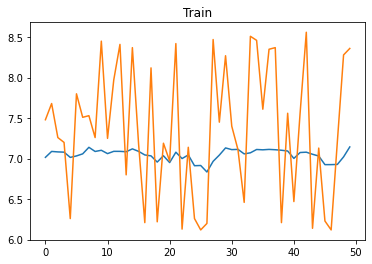

2/2 [==============================] - 9s 24ms/step


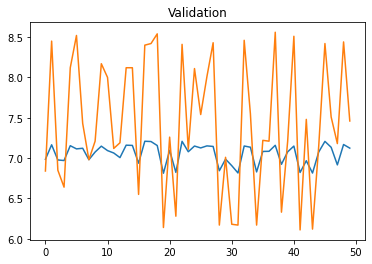

3/3 [==============================] - 0s 7ms/step


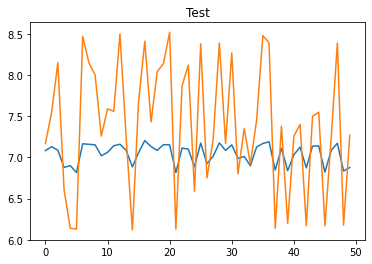

3/3 [==============================] - 0s 7ms/step


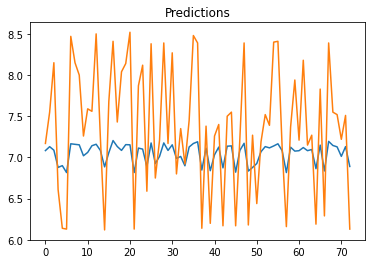

In [38]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [39]:
mavg_auto_lstm_mse

0.5262695387285368

# Hybrid

## General

### CNN LSTM

In [40]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 56.2725 - root_mean_squared_error: 7.5015

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 172s 19s/step - loss: 56.2725 - root_mean_squared_error: 7.5015 - val_loss: 47.1405 - val_root_mean_squared_error: 6.8659
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 46.6099 - root_mean_squared_error: 6.8271

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 133s 18s/step - loss: 46.6099 - root_mean_squared_error: 6.8271 - val_loss: 44.0915 - val_root_mean_squared_error: 6.6401
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 43.7214 - root_mean_squared_error: 6.6122

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 97s 14s/step - loss: 43.7214 - root_mean_squared_error: 6.6122 - val_loss: 40.5565 - val_root_mean_squared_error: 6.3684
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 40.1725 - root_mean_squared_error: 6.3382

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 129s 18s/step - loss: 40.1725 - root_mean_squared_error: 6.3382 - val_loss: 37.7428 - val_root_mean_squared_error: 6.1435
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 37.3345 - root_mean_squared_error: 6.1102

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 117s 16s/step - loss: 37.3345 - root_mean_squared_error: 6.1102 - val_loss: 35.1294 - val_root_mean_squared_error: 5.9270
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 35.1068 - root_mean_squared_error: 5.9251

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 134s 19s/step - loss: 35.1068 - root_mean_squared_error: 5.9251 - val_loss: 33.3672 - val_root_mean_squared_error: 5.7764
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 33.3662 - root_mean_squared_error: 5.7764

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 121s 17s/step - loss: 33.3662 - root_mean_squared_error: 5.7764 - val_loss: 31.7116 - val_root_mean_squared_error: 5.6313
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 31.6634 - root_mean_squared_error: 5.6270

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 102s 15s/step - loss: 31.6634 - root_mean_squared_error: 5.6270 - val_loss: 30.0061 - val_root_mean_squared_error: 5.4778
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 29.7769 - root_mean_squared_error: 5.4568

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 143s 20s/step - loss: 29.7769 - root_mean_squared_error: 5.4568 - val_loss: 28.1188 - val_root_mean_squared_error: 5.3027
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 27.9829 - root_mean_squared_error: 5.2899

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 105s 15s/step - loss: 27.9829 - root_mean_squared_error: 5.2899 - val_loss: 26.2263 - val_root_mean_squared_error: 5.1212
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 25.7353 - root_mean_squared_error: 5.0730

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 116s 16s/step - loss: 25.7353 - root_mean_squared_error: 5.0730 - val_loss: 24.0460 - val_root_mean_squared_error: 4.9037
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 24.0667 - root_mean_squared_error: 4.9058

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 111s 15s/step - loss: 23.9964 - root_mean_squared_error: 4.8986 - val_loss: 22.5176 - val_root_mean_squared_error: 4.7453
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 22.4634 - root_mean_squared_error: 4.7396

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 111s 16s/step - loss: 22.4634 - root_mean_squared_error: 4.7396 - val_loss: 21.0369 - val_root_mean_squared_error: 4.5866
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 20.9732 - root_mean_squared_error: 4.5797

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 110s 15s/step - loss: 20.9732 - root_mean_squared_error: 4.5797 - val_loss: 19.6132 - val_root_mean_squared_error: 4.4287
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 19.5464 - root_mean_squared_error: 4.4211

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 115s 16s/step - loss: 19.5464 - root_mean_squared_error: 4.4211 - val_loss: 18.2412 - val_root_mean_squared_error: 4.2710
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 18.2582 - root_mean_squared_error: 4.2730

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 107s 15s/step - loss: 18.1844 - root_mean_squared_error: 4.2643 - val_loss: 16.9216 - val_root_mean_squared_error: 4.1136
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 16.8217 - root_mean_squared_error: 4.1014

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 132s 19s/step - loss: 16.8217 - root_mean_squared_error: 4.1014 - val_loss: 15.5730 - val_root_mean_squared_error: 3.9463
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 15.4936 - root_mean_squared_error: 3.9362

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 128s 18s/step - loss: 15.4936 - root_mean_squared_error: 3.9362 - val_loss: 14.2893 - val_root_mean_squared_error: 3.7801
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 14.2082 - root_mean_squared_error: 3.7694

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 118s 17s/step - loss: 14.2082 - root_mean_squared_error: 3.7694 - val_loss: 13.0544 - val_root_mean_squared_error: 3.6131
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 12.9197 - root_mean_squared_error: 3.5944

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 121s 17s/step - loss: 12.9197 - root_mean_squared_error: 3.5944 - val_loss: 11.6120 - val_root_mean_squared_error: 3.4076
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 11.5170 - root_mean_squared_error: 3.3937

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 110s 15s/step - loss: 11.5170 - root_mean_squared_error: 3.3937 - val_loss: 10.5606 - val_root_mean_squared_error: 3.2497
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 10.5663 - root_mean_squared_error: 3.2506

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 145s 21s/step - loss: 10.5663 - root_mean_squared_error: 3.2506 - val_loss: 9.7536 - val_root_mean_squared_error: 3.1231
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 9.7647 - root_mean_squared_error: 3.1249

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 127s 18s/step - loss: 9.7647 - root_mean_squared_error: 3.1249 - val_loss: 9.0191 - val_root_mean_squared_error: 3.0032
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 9.0372 - root_mean_squared_error: 3.0062

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 109s 15s/step - loss: 9.0372 - root_mean_squared_error: 3.0062 - val_loss: 8.3421 - val_root_mean_squared_error: 2.8883
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 8.3659 - root_mean_squared_error: 2.8924

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 143s 20s/step - loss: 8.3659 - root_mean_squared_error: 2.8924 - val_loss: 7.7177 - val_root_mean_squared_error: 2.7781
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 7.7428 - root_mean_squared_error: 2.7826

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 133s 19s/step - loss: 7.7428 - root_mean_squared_error: 2.7826 - val_loss: 7.1400 - val_root_mean_squared_error: 2.6721
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 7.1674 - root_mean_squared_error: 2.6772

KeyboardInterrupt: 

In [ ]:
hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_rnn_gru_mse

### LSTM RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_lstm_rnn_gru_mse

## Moving Average

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_rnn_gru_mse

### RNN LSTM GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_lstm_rnn_gru_mse

# MSE

In [ ]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]

msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [ ]:
msedf

In [ ]:
msedf.to_csv("msedf.csv", index= False)

In [ ]:
msedf.plot("Model", "RMSE", kind= "bar")

In [ ]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)